In [1]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt

# Input your image
I'm using an online example. You should import the different test cases provided.

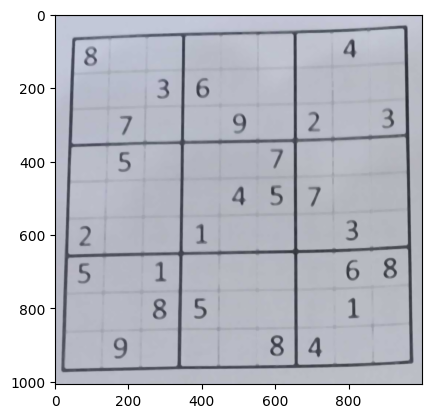

In [2]:
# Switch between the following two samples if you want to see different examples
#req = urllib.request.urlopen('https://live.staticflickr.com/8027/6978422072_33ac92fe1a_b.jpg')
# req = urllib.request.urlopen('https://sources.roboflow.com/dcbM99GUgvVCEMo4F2rq8vaVApB2/DSJGI2e7g77XqctWIGQG/original.jpg')
#arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
#img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.imread(rf"d:\Ain Shams University\Senior-1\Computer Vision\Project\Materials\Official TestCases\Succ\01-Normal.jpg")
img = cv2.copyMakeBorder(img, 7, 0, 0, 0, cv2.BORDER_WRAP)
img = cv2.medianBlur(img, 9)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
HOUGH = True
HARRIS = False
DarkMode = False
Extend_Lines = False
SHADOW = False

plt.imshow(img_rgb)

# Convert to grayscale
We don't need any color information.

[1712.]


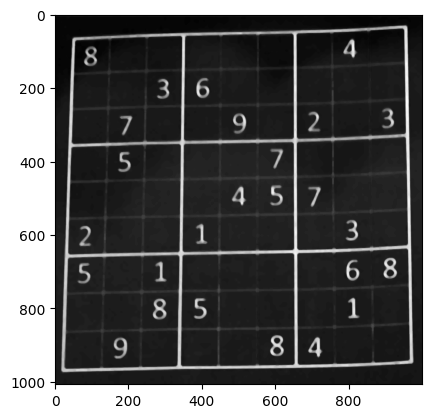

In [3]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])

black_pixels = hist[0:128]

# Find the intensity value with the maximum count (peak of the histogram)
peak_intensity = np.argmax(black_pixels)
Equalized_image = False
# Check if the count at the peak is greater than a certain threshold
print(hist[peak_intensity])
if hist[peak_intensity] > 600000:
    print("Equalized")
    Equalized_image = True
    img_gray = cv2.equalizeHist(img_gray)

if hist[peak_intensity] < 2300 and hist[peak_intensity] > 2200:
    print("Adaptively Equalized")

    Equalized_image = True
    Extend_Lines = True
    clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(10, 10))
    img_gray = clahe.apply(img_gray)
#     result =  255 * (img_gray/255)**20
if hist[peak_intensity] > 9500 and hist[peak_intensity] < 9600:
    print("YES")
    (T, img_gray) = cv2.threshold(img_gray, 121, 255, cv2.THRESH_BINARY)

plt.imshow(~img_gray, cmap="gray");

# Thresholding step
We don't need the full scale of grayscale either, just binary. But, is ordinary thresholding enough? Or is "adaptive thresholding" better?

Do your research!

872788 1007000 0.8667209533267131


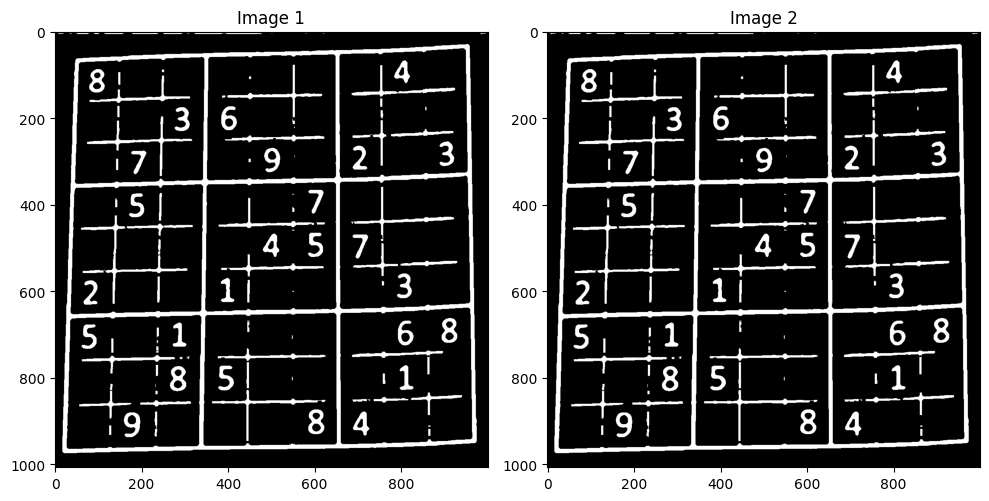

In [4]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=111,
    C=5
)

img_gray_threshed2 = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=111, #we need to increase the blocksize so the gaps are filled
    C=5
)


non_zero_pixels = cv2.countNonZero(img_gray_threshed2)
imgheight, imgwidth = img.shape[:2]
total_pixels = imgheight * imgwidth

zero_pixels = total_pixels - non_zero_pixels

percentage = zero_pixels / total_pixels

print(zero_pixels, total_pixels , percentage)


if percentage < 0.82:
    #DarkMode = True
    print("Dark Mode")
    if Equalized_image:
        print("Equalized_image")
        img_gray_threshed2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)
        
    else:
        img_gray_threshed2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV ,51, 5) 
        if hist[peak_intensity]>2000:
            DarkMode = True
            print("Dark Mode")

    # img_gray_threshed2 = cv2.bitwise_not(img_gray_threshed2)


# plt.imshow(img_gray_threshed, cmap="gray");
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Show the first image
axes[0].imshow(img_gray_threshed, cmap="gray")
axes[0].set_title('Image 1')

# Show the second image
axes[1].imshow(img_gray_threshed2, cmap="gray")
axes[1].set_title('Image 2')

plt.tight_layout()

# Show the plots
plt.show()


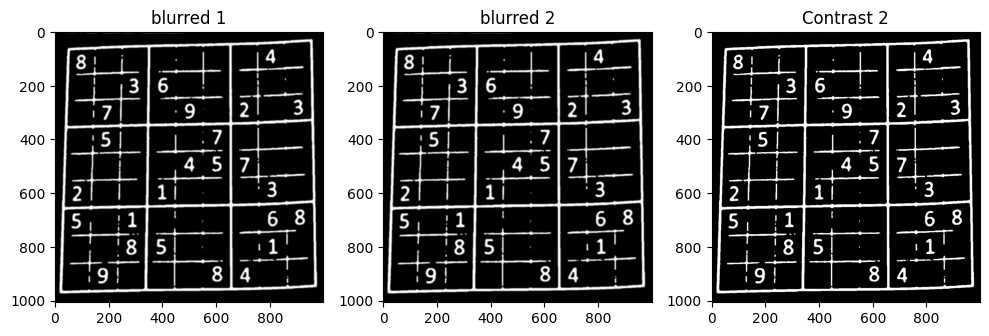

In [5]:
# Get the size of the image
height, width = img.shape[:2]

# Calculate the size of the Gaussian kernel
kernel_size = int(width * 0.01) if width > height else int(height * 0.01)

# The kernel size should be odd
if kernel_size % 2 == 0:
    kernel_size += 1

#(7,7) temp--> should be (kernel_size,kernel_size)
blur_mat = (7,7) 
# Increase the contrast (double it)
contrast_img = cv2.convertScaleAbs(img_gray_threshed, alpha=2, beta=0)
contrast_img2 = cv2.convertScaleAbs(img_gray_threshed2, alpha=2, beta=0)

blurred = cv2.GaussianBlur(contrast_img, blur_mat, 0)
blurred2 = cv2.GaussianBlur(contrast_img2, blur_mat, 0)

# binarized = cv2.threshold(blurred, 125, 255)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
# Show the first image
axes[0].imshow(blurred, cmap="gray")
axes[0].set_title('blurred 1')

# Show the second image
axes[1].imshow(blurred2, cmap="gray")
axes[1].set_title('blurred 2')

# Show the second image
axes[2].imshow(contrast_img2, cmap="gray")
axes[2].set_title('Contrast 2')
plt.tight_layout()

# Show the plots
plt.show()

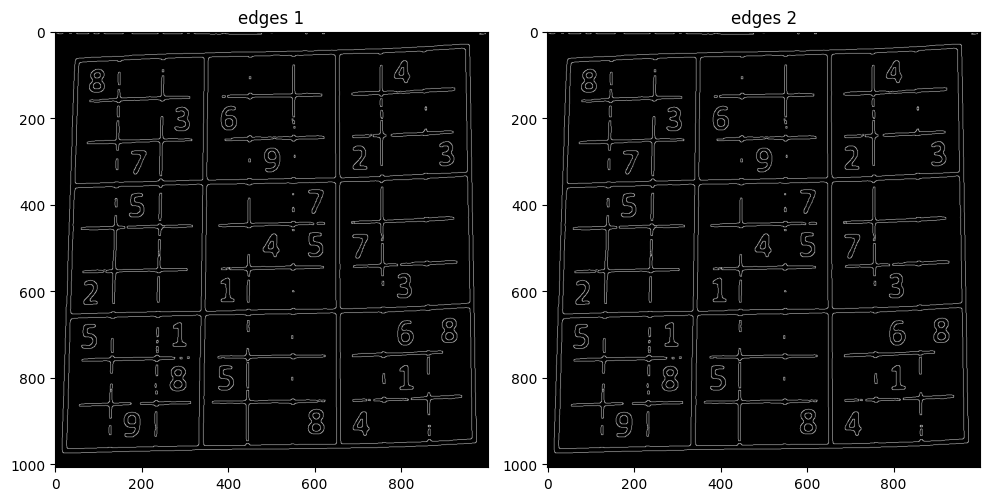

In [6]:
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)
edges2 = cv2.Canny(blurred2, 50, 150, apertureSize=3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Show the first image
axes[0].imshow(edges, cmap="gray")
axes[0].set_title('edges 1')

# Show the second image
axes[1].imshow(edges2, cmap="gray")
axes[1].set_title('edges 2')

plt.tight_layout()

# Show the plots
plt.show()

# Extra 
Get Intersections by Horizontal & Vertical Lines

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

mask = np.zeros((blurred2.shape),np.uint8)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

close = cv2.morphologyEx(blurred2,cv2.MORPH_CLOSE,kernel1)
div = np.float32(blurred2)/(close)
res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
res2 = cv2.cvtColor(res,cv2.COLOR_GRAY2BGR)
contour,hier = cv2.findContours(img_gray_threshed2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
best_cnt = None
for cnt in contour:
    area = cv2.contourArea(cnt)
    if area > 1000:
        if area > max_area:
            max_area = area
            best_cnt = cnt

cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)

res = cv2.bitwise_and(res,mask)
kernelx = cv2.getStructuringElement(cv2.MORPH_RECT,(2,10))

dx = cv2.Sobel(res,cv2.CV_16S,1,0)
dx = cv2.convertScaleAbs(dx)
cv2.normalize(dx,dx,0,255,cv2.NORM_MINMAX)
ret,close = cv2.threshold(dx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
close = cv2.morphologyEx(close,cv2.MORPH_DILATE,kernelx,iterations = 1)

contour, hier = cv2.findContours(close,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contour:
    x,y,w,h = cv2.boundingRect(cnt)
    if h/w > 5:
        cv2.drawContours(close,[cnt],0,255,-1)
    else:
        cv2.drawContours(close,[cnt],0,0,-1)
close = cv2.morphologyEx(close,cv2.MORPH_CLOSE,None,iterations = 2)
closex = close.copy()
kernely = cv2.getStructuringElement(cv2.MORPH_RECT,(10,2))
dy = cv2.Sobel(res,cv2.CV_16S,0,2)
dy = cv2.convertScaleAbs(dy)
cv2.normalize(dy,dy,0,255,cv2.NORM_MINMAX)
ret,close = cv2.threshold(dy,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
close = cv2.morphologyEx(close,cv2.MORPH_DILATE,kernely)

contour, hier = cv2.findContours(close,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contour:
    x,y,w,h = cv2.boundingRect(cnt)
    if w/h > 5:
        cv2.drawContours(close,[cnt],0,255,-1)
    else:
        cv2.drawContours(close,[cnt],0,0,-1)

close = cv2.morphologyEx(close,cv2.MORPH_DILATE,None,iterations = 2)
closey = close.copy()
res = cv2.bitwise_and(closex,closey)


# Show the first image
axes[0].imshow(closex, cmap="gray")
axes[0].set_title('Vertical Edges')

# Show the second image
axes[1].imshow(closey, cmap="gray")
axes[1].set_title('Horizontal Edges')

# Show the second image
axes[2].imshow(res, cmap="gray")
axes[2].set_title('Intersections')


plt.tight_layout()

# Show the plots
plt.show()



# Detect the lines
One way is to use Hough transform. It may not be the best way, there are other ways, and I've done zero noise removal in this guide so far.

This is very sub-optimal and will most likely not work reliably on all cases. Do your research!

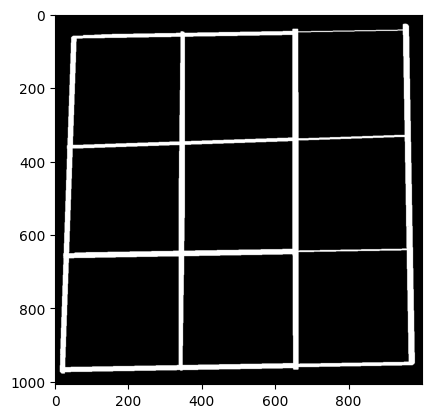

In [7]:
# Detect lines that are not smaller in length than:
minLineLength = min(edges2.shape[0],edges2.shape[1])/2

lines = cv2.HoughLinesP(
    image=blurred2,
    rho=1,
    theta=np.pi/180,
    threshold=200,
    minLineLength=minLineLength,
    maxLineGap=10
)

tmp_img = np.zeros_like(edges2, dtype = np.uint8)
for x1, y1, x2, y2 in lines[:,0]: cv2.line(tmp_img,(x1,y1),(x2,y2),(255,0,0),2)
plt.imshow(tmp_img, cmap='gray');

In [8]:
if Extend_Lines == True:
    exended_lines_img = np.zeros_like(edges2, dtype = np.uint8)
    for i,(x1, y1, x2, y2) in enumerate(lines[:,0]): 
        cv2.line(exended_lines_img,(x1,y1),(x2,y2),(255,0,0),2)
        if(abs(y1-y2) in range(0,20)):
            if(x1>x2):
                cv2.line(exended_lines_img,(0,y1),(x1,y1),(255,0,0),2)
                lines[i][0][0] = 0
                lines[i][0][1] = y1
                lines[i][0][2] = x1
                lines[i][0][3] = y1
            else:
                cv2.line(exended_lines_img,(0,y1),(x2,y1),(255,0,0),2)
                lines[i][0][0] = 0
                lines[i][0][1] = y1
                lines[i][0][2] = x2
                lines[i][0][3] = y1
        if(abs(x1-x2) in range(0,20)):
            if(y1>y2):
                cv2.line(exended_lines_img,(x1,0),(x1,y1),(255,0,0),2)
                lines[i][0][0] = x1
                lines[i][0][1] = 0
                lines[i][0][2] = x1
                lines[i][0][3] = y1
            else : 
                cv2.line(exended_lines_img,(x1,0),(x1,y2),(255,0,0),2)
                lines[i][0][0] = x1
                lines[i][0][1] = 0
                lines[i][0][2] = x1
                lines[i][0][3] = y2
    plt.imshow(exended_lines_img,cmap="gray");


# Find the intersections between the lines
Lots of magic numbers here. How to tweak? How to generalize? Do your research!


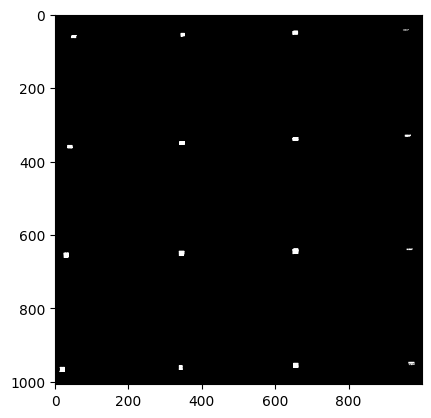

In [9]:
try:
    tmp_img2 = np.zeros_like(img_gray_threshed2, dtype = np.uint16)

    def angle_between_lines(line1, line2):
        l1x1, l1y1, l1x2, l1y2 = line1
        l2x1, l2y1, l2x2, l2y2 = line2
        a1 = np.rad2deg(np.arctan2(l1y2 - l1y1, l1x2 - l1x1))
        a2 = np.rad2deg(np.arctan2(l2y2 - l2y1, l2x2 - l2x1))
        return np.abs(a1 - a2)

    def intersection_point(line1, line2):
        # https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection
        l1x1, l1y1, l1x2, l1y2 = line1
        l2x1, l2y1, l2x2, l2y2 = line2
        nx = (l1x1*l1y2-l1y1*l1x2)*(l2x1-l2x2)-(l2x1*l2y2-l2y1*l2x2)*(l1x1-l1x2)
        ny = (l1x1*l1y2-l1y1*l1x2)*(l2y1-l2y2)-(l2x1*l2y2-l2y1*l2x2)*(l1y1-l1y2)
        d = (l1x1-l1x2)*(l2y1-l2y2)-(l1y1-l1y2)*(l2x1-l2x2)
        px = int(nx / d)
        py = int(ny / d)
        return (px, py)

    def point_on_line(point, line):
        def distance(pfrom, pto): return np.sqrt((pfrom[0] - pto[0])**2 + (pfrom[1] - pto[1])**2)
        diff = distance(point, line[0:2]) + distance(point, line[2:4]) - distance(line[0:2], line[2:4])
        return np.abs(diff) < 75

    intersections = []
    num_of_lines = len(lines[:,0])
    for i in range(num_of_lines):
        for j in range(i+1, num_of_lines):
            line1 = lines[i,0]
            line2 = lines[j,0]
            if (line1 is line2): continue
            a = angle_between_lines(line1, line2)
            if (a < 80 or a > 100): continue
            p = intersection_point(line1, line2)
            if point_on_line(p, line1) and point_on_line(p, line2):
                tmp_img2[p[::-1]] = 5000
                intersections.append(p[::-1])



    plt.imshow(tmp_img2, cmap="gray", vmin=0, vmax=1255)

except:
    print("estandaf el camera")

1189
857163.0


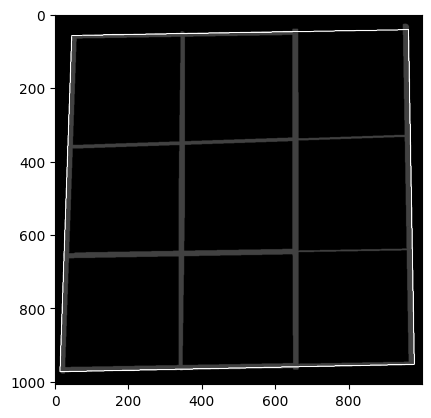

In [10]:
try: 
    p1 = sorted(intersections, key = lambda p: p[0] + p[1])[0] # topleft
    p2 = sorted(intersections, key = lambda p: p[0] - p[1])[0] # topright
    p3 = sorted(intersections, key = lambda p: p[0] + p[1])[-1] # bottright
    p4 = sorted(intersections, key = lambda p: p[1] - p[0])[0] # bottleft
    print(len(intersections))
    coords = np.int32([[p1[::-1], p2[::-1], p3[::-1], p4[::-1]]])
    tmp_img3 = np.zeros_like(img_gray_threshed, dtype = np.int32)
    tmp_img3 = cv2.polylines(tmp_img3, coords, isClosed=True, color=(2550,0,0))
    #######################################################
    #Getting area of polygon
    coords_temp = [tuple(pt) for pt in coords[0]]
    xp = [p[0] for p in coords_temp]
    yp = [p[1] for p in coords_temp]
    area = 0.5 * abs(sum(xp[i-1]*yp[i] - xp[i]*yp[i-1] for i in range(len(coords_temp))))
    print(area)
    if area < 300000:
        HARRIS=True
        HOUGH=False
    plt.imshow(tmp_img3 + tmp_img, cmap="gray", vmax=1000)

except:
    print("Enta lessa mastandaftesh")


# Our Contours

outer_contour Using Max Connected Components
[[[956  31]]

 [[ 48  64]]

 [[ 19 974]]

 [[972 950]]]
outer_contour2 Using FindContour() on Masked Image
[[[955  31]]

 [[ 48  65]]

 [[ 20 974]]

 [[972 949]]]


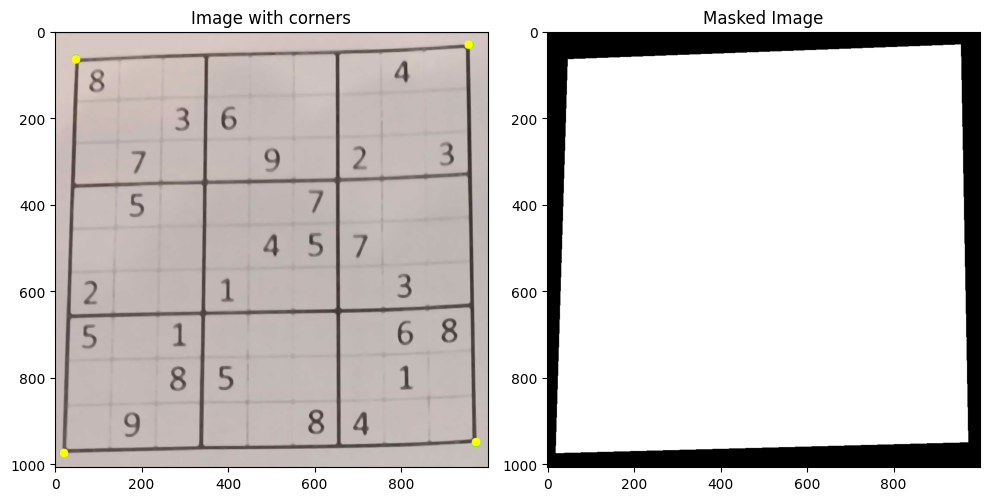

In [11]:
# Find All contours using TREE
contours, _ = cv2.findContours(edges2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Calculate the ratio for  700x700 Reference image
reference_total_area = 700 * 700
reference_threshold_area = 50000
reference_ratio = reference_threshold_area / reference_total_area
total_area = img.shape[0] * img.shape[1]
threshold_area = reference_ratio * total_area

filtered_contours = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    if len(approx) == 4 and cv2.contourArea(approx) > threshold_area:
        filtered_contours.append(approx)

max_components = 0
outer_contour = None

for contour in filtered_contours:
    # Create a mask contains the contour filled in
    mask = np.zeros_like(edges2)
    cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)

    # Apply connectedComponents on the mask
    num_labels, labels = cv2.connectedComponents(mask)

    # If this contour has more connected components than the previous maximum, update the maximum
    if num_labels > max_components:
        max_components = num_labels
        outer_contour = contour

print("outer_contour Using Max Connected Components")
print(outer_contour)

if outer_contour is not None:
    # counter = 0
    # for x in contours:
    #     counter += 1
    #     for contour in x:
    #         cv2.circle(img, tuple(contour[0]), 10, (255, counter, 0), -1)

    # Draw all corner candidates in green
    for x in filtered_contours:
        for f in x:
            cv2.circle(img, tuple(f[0]), 10, (0, 255, 0), -1)

    # find EXTERNAL contours in masked image
    contours2, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours2 = []
    for contour in contours2:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        if len(approx) == 4 and cv2.contourArea(approx) > 10000:
            filtered_contours2.append(approx)

    #Get outermost contour
    outer_contour2 = max(filtered_contours2, key=cv2.contourArea)
    print("outer_contour2 Using FindContour() on Masked Image")
    print(outer_contour2)
    corners=outer_contour2

    # Draw the  selected corners in Yellow
    for corner in corners:
        cv2.circle(img, tuple(corner[0]), 10, (255, 255, 0), -1)

    ################################################################################
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Show the first image
    axes[0].imshow(img, cmap="gray")
    axes[0].set_title('Image with corners')

    # Show the second image
    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title('Masked Image')

    plt.tight_layout()

    # Show the plots
    plt.show()
else:
    pass


In [12]:
def sort_contor_points(contour):
    contour_point=[]
    ret = []
    for i in range(0,4):
        (x,y) = contour[i][0]
        contour_point.append((x,y))
#     print(contour_point)
    #p1 top left
    #p2 top right
    #p3 bottom left
    #p4 bottom right
    x_desc = sorted(contour_point, key = lambda p: p[0])  # sorting wrt x
    if(x_desc[0][1]<x_desc[1][1]):
        p1= x_desc[0]
        p3 = x_desc[1]
    else:
        p1 = x_desc[1]
        p3 = x_desc[0]

    if(x_desc[2][1]<x_desc[3][1]):
        p2= x_desc[2]
        p4 = x_desc[3]
    else:
        p2= x_desc[3]
        p4 = x_desc[2]
        

    if abs(contour_point[0][0]-contour_point[1][0])>50 or  abs(contour_point[0][1]-contour_point[1][1])>50 :
        ROTATED = True
        
#         target_corners = np.float32([[450, 0], [0, 0], [0, 450], [450, 450]])

#     print(f"top left{p1}")
#     print(f"top right{p2}")
#     print(f"bottom left{p3}")
#     print(f"bottom right{p4}")
#     print(np.float32([p2,p1,p3,p4]))
    return np.float32([p2,p1,p3,p4])
# sort_contor_points(outer_contour2)
# print(corners.astype(np.float32))


# Harris Trial

In [13]:
if outer_contour is None and HOUGH is False:    
    HARRIS = True
    cornersHARRIS = cv2.cornerHarris(
        src=img_gray_threshed2,  # Input single-channel 8-bit or floating-point image
        blockSize=11,  # Size of binary window (square)
        ksize=3,  # Aperture parameter for the Sobel operator (square)
        k=0.04,  # Harris detector free parameter between 0.04 and 0.06
    )
    thresh = cv2.threshold(cornersHARRIS, 0.01 * cornersHARRIS.max(), 255, cv2.THRESH_BINARY)[1]
    thresh = np.uint8(thresh)
    kernel = np.ones((11,11),np.uint8)
    thresh2 = cv2.dilate(thresh, kernel, iterations = 5)
    dilation_error_approx = (11*5)/2   #like center of kernel ((size*iterations)/2)

    contours, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = []
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        if len(approx) == 4 and cv2.contourArea(approx) > 3500:
            filtered_contours.append(approx)

    outer_contour2 = max(filtered_contours, key=cv2.contourArea)
    corners= outer_contour2
    temp_corners = outer_contour2
    
    ###Fixing Dilation Error###
    corners[0][0][0]= temp_corners[0][0][0] - dilation_error_approx    #upright
    corners[0][0][1]= temp_corners[0][0][1] + dilation_error_approx    #upright
    corners[1]= temp_corners[1] + dilation_error_approx                ##upleft
    corners[2][0][0]= temp_corners[2][0][0] + dilation_error_approx     #downleft
    corners[2][0][1]= temp_corners[2][0][1] - dilation_error_approx     #downleft
    corners[3]= temp_corners[3] - dilation_error_approx                ##downright

    print(temp_corners[2][0][0])
    for corner in corners:
        cv2.circle(img, tuple(corner[0]), 10, (255, 0, 255), -1)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Show the first image
    axes[0].imshow(img, cmap="gray")
    axes[0].set_title('Image with corners')

    # Show the second image
    axes[1].imshow(thresh2, cmap="gray")
    axes[1].set_title('thresh2')

    plt.tight_layout()

    # Show the plots
    plt.show()

# Template Matching
Not Used

# template matching
template = cv2.imread('d:\Ain Shams University\Senior-1\Computer Vision\Project\Materials\Template\images.jpg', cv2.IMREAD_GRAYSCALE)

# Perform template matching
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCORR_NORMED)

# Set the threshold for matching results
threshold = 0.5

# Find locations where the matching score is above the threshold
loc = np.where(res >= threshold)

# Get the width and height of the template image
height, width = template.shape[::-1]

for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + width, pt[1] + height)
    cv2.rectangle(img, pt, bottom_right, (0, 0, 255), 2)
# Calculate the center point of the image
center_x = img_gray.shape[1] // 2
center_y = img_gray.shape[0] // 2

for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + width, pt[1] + height)
    cv2.rectangle(img, pt, bottom_right, (0, 0, 255), 2)

    # Reflect the bounding rectangle around the center
    reflected_pt = (
        center_x - (pt[0] - center_x),
        center_y - (pt[1] - center_y)
    )
    reflected_bottom_right = (
        center_x + (center_x - bottom_right[0]),
        center_y + (center_y - bottom_right[1])
    )
    cv2.rectangle(img, reflected_pt, reflected_bottom_right, (0, 0, 255), 2)
# Save the result image
cv2.imwrite('res2.png', img)
###################################

# Extra: Sort the Grid Corner-Points
Not used

In [14]:
def sort_points(points):
    #2D array of shape
    reshaped_points = points.reshape((4, 2))

    # Sort x-coordinate + y-coordinate TOP-LEFT
    sorted_points = reshaped_points[np.argsort(reshaped_points.sum(axis=1))]

    # Now, diff is negative for points with x > y (right of the main diagonal)
    diff = np.diff(sorted_points, axis=1)

    # Swap last two points if necessary to ensure clockwise order
    if diff[2] < diff[3]:
        sorted_points[2], sorted_points[3] = sorted_points[3], sorted_points[2].copy()

    # Reshape sorted points back to original format
    sorted_points = sorted_points.reshape(-1, 1, 2).astype(np.int32)

    return sorted_points

#corners=sort_points(corners)
#print(corners)

# Perform a perspective transform
Thankfully, if you got the frame right, this step is straight-forward. No research to be done here. (=

Just try not to go insane over the amount of inconsistency in coordinates between Numpy and OpenCV.

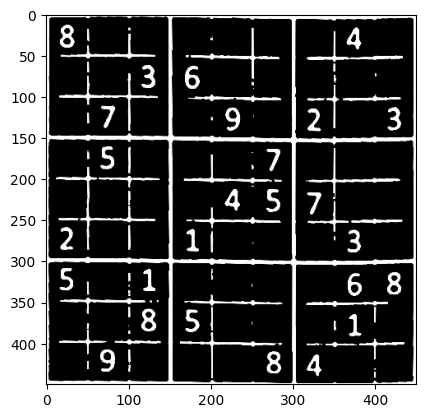

In [15]:
# Perspective transform
if outer_contour is not None or HARRIS:
    target_corners = np.float32([[450, 0], [0, 0], [0, 450], [450, 450]])
#     target_corners = sort_contor_points(outer_contour2)
    #rotate:
    #target_corners = np.float32([[0, 0], [0, 450], [450, 450],[450, 0] ]) #for broken printer
    if DarkMode:
        target_corners = np.float32([[0, 0], [0, 450], [450, 450],[450, 0] ])
        # !!!!!!!!!!!!!!!!!! MARIAM CHANGED SOME CODE HERE !!!!!!!!!!!!!!!!
#     transform_matrix = cv2.getPerspectiveTransform(corners.astype(np.float32), target_corners)
    transform_matrix = cv2.getPerspectiveTransform(sort_contor_points(outer_contour2).astype(np.float32), target_corners)

    #ret,img_gray_threshed2 = cv2.threshold(img_gray,120,255,cv2.THRESH_BINARY_INV) #for broken printer
    if Equalized_image:
        ret,img_gray_threshed2 = cv2.threshold(img_gray,77,255,cv2.THRESH_BINARY_INV)
    if HARRIS:
        print("HARRIS")
        kernel = np.ones((5,5),np.uint8)
        img_gray_threshed2 = cv2.dilate(img_gray_threshed2, kernel, iterations = 1)  
    if DarkMode:
        ret,tempdark = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)
        tempdark = cv2.adaptiveThreshold(tempdark, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 151, 11)
        ret,tempdark2 = cv2.threshold(img_gray,150,255,cv2.THRESH_BINARY_INV)
        tempdark2 = cv2.adaptiveThreshold(tempdark2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 111, 5)
        darkcontours, _ = cv2.findContours(tempdark2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        kernel = np.ones((5,5),np.uint8)
        eroded_img = cv2.erode(tempdark2, kernel, iterations=5)
        final_img = cv2.dilate(eroded_img, kernel, iterations=5)

    if DarkMode:
        transform_matrix = cv2.getPerspectiveTransform(corners.astype(np.float32), target_corners)
        warped = cv2.warpPerspective(tempdark2+tempdark-final_img, transform_matrix, (450, 450)) # a7la morphological
    elif SHADOW:
        (T, img_gray) = cv2.threshold(img_gray, 140, 255, cv2.THRESH_BINARY)
        warped = cv2.warpPerspective(img_gray, transform_matrix, (450, 450))

    else:
        warped = cv2.warpPerspective(img_gray_threshed2, transform_matrix, (450, 450))

    plt.imshow(warped, cmap="gray");
else:
    print('hello')  
    y, x = img_gray_threshed2.shape
    src_coords = np.float32([[0,0], [x,0], [x,y], [0,y]])
    dst_coords = np.float32([[p1[::-1], p2[::-1], p3[::-1], p4[::-1]]])
    if Equalized_image and Extend_Lines:
        print('hi2')
        extended = ~img_gray
        extended = cv2.warpPerspective(
        src=extended,
        M=cv2.getPerspectiveTransform(dst_coords, src_coords),
        dsize=extended.shape[::-1])
        img_gray_threshed_warped = extended
        ret,img_gray_threshed_warped[:,200:1000] = cv2.threshold(img_gray_threshed_warped[:,200:1000],140,255,cv2.THRESH_BINARY)
        ret,img_gray_threshed_warped[:,0:200] = cv2.threshold(img_gray_threshed_warped[:,0:200],100,255,cv2.THRESH_BINARY)
        #plt.imshow(img_gray_threshed_warped, cmap="gray");

    if Equalized_image and not Extend_Lines:
        ret,img_gray_threshed2 = cv2.threshold(img_gray,77,255,cv2.THRESH_BINARY_INV)
        kernel = np.ones((5,5),np.uint8)
        #img_gray_threshed2 = cv2.dilate(img_gray_threshed2, kernel, iterations = 1)
    if Extend_Lines:
        pass
    else:
        img_gray_threshed_warped = cv2.warpPerspective(
        src=img_gray_threshed2,
        M=cv2.getPerspectiveTransform(dst_coords, src_coords),
        dsize=img_gray_threshed2.shape[::-1]
        )
        print('hi')

    #plt.imshow(img_gray_threshed_warped, cmap="gray");


# Separate the number tiles

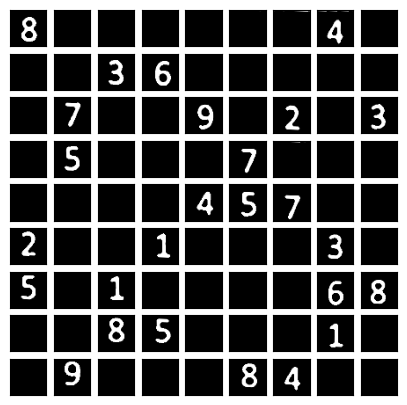

In [16]:
tolerance = 4 #don't make it more than 4 :)
if DarkMode:
    tolerance = 9
if Extend_Lines:
    tolerance = 12
if outer_contour is not None or HARRIS:
    M = warped.shape[0] // 9
    N = warped.shape[1] // 9
    #Tolerance (in pixels)

    number_tiles = []
    for i in range(9):
        number_tiles.append([])
        for j in range(9):
            # Add/subtract the tolerance from the slice indices
            #tile = warped[max(0, i*M-tolerance):(i+1)*M+tolerance, max(0, j*N-tolerance):(j+1)*N+tolerance]
            tile =warped[i*M+tolerance:(i+1)*M-tolerance, j*N+tolerance:(j+1)*N-tolerance]
            number_tiles[i].append(tile)


    _, axes = plt.subplots(9, 9, figsize=(5, 5))
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(number_tiles[i][j], cmap="gray");
            col.get_xaxis().set_visible(False)
            col.get_yaxis().set_visible(False)
else:
    M = img_gray_threshed_warped.shape[0] // 9
    N = img_gray_threshed_warped.shape[1] // 9
    number_tiles = []
    for i in range(9):
        number_tiles.append([])
        for j in range(9):
            tile = img_gray_threshed_warped[i*M+tolerance:(i+1)*M-tolerance, j*N+tolerance:(j+1)*N-tolerance]
            number_tiles[i].append(tile)

    _, axes = plt.subplots(9, 9, figsize=(5, 5))
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(number_tiles[i][j], cmap="gray");
            col.get_xaxis().set_visible(False)
            col.get_yaxis().set_visible(False)
    

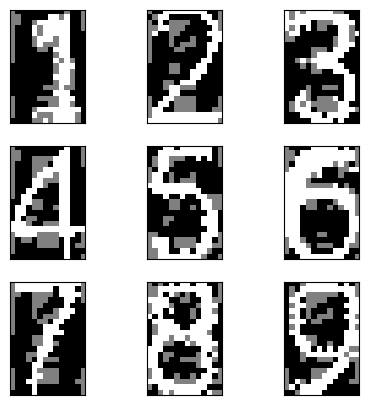

In [17]:
digit_ses = []
for i in range(9):
    se = cv2.imread(rf"D:\Ain Shams University\Senior-1\Computer Vision\Project\Phase 2 tests\Official Numbers/{i+1}.jpg", cv2.IMREAD_GRAYSCALE)
    se_canvas = np.zeros_like(se, dtype = np.int16)
    se_canvas[se < 64] = -1
    se_canvas[se > 192] = 1
    digit_ses.append(se_canvas)
_, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(digit_ses[i*3+j], cmap="gray", vmin=-1, vmax=1);
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

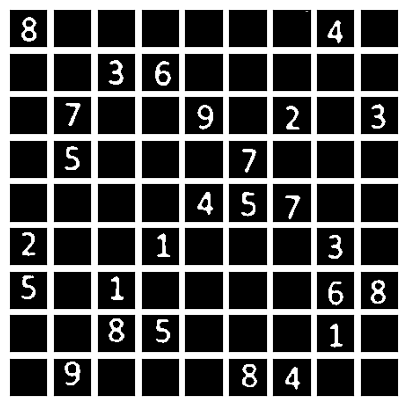

In [18]:
tiles = [cv2.threshold(number_tiles[t//9][t%9], 250, 255, cv2.THRESH_BINARY)[1] for t in range(9*9)]
_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(tiles[i*9 + j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

In [19]:
if SHADOW:
     pass  
#       tiles[t]= cv2.threshold(number_tiles[t//9][t%9], 110, 255, cv2.THRESH_BINARY_INV)
#         else :
#             (T, tiles[t]) = cv2.threshold(number_tiles[t//9][t%9], 140, 255, cv2.THRESH_BINARY_INV)
            
#     _, axes = plt.subplots(9, 9, figsize=(5, 5))
#     for i, row in enumerate(axes):
#         for j, col in enumerate(row):
#             col.imshow(tiles[i*9 + j], cmap="gray");
#             col.get_xaxis().set_visible(False)
#             col.get_yaxis().set_visible(False)
#     print(SHADOW)


In [20]:
# remove white grid edges 
if Extend_Lines == True or (tiles[0].shape[0] > 100 and tiles[0].shape[1] > 100) :
    for i, tile in enumerate(tiles):
        (x,y) = tile.shape
        x *= 15/100
        y *= 15/100
        x = int(x)
        y = int(y)
        tiles[i][0:x,:] = 0
        tiles[i][tile.shape[0]-x:tile.shape[0],:] = 0
        tiles[i][:,0:y] = 0
        tiles[i][:,tile.shape[1]-y:tile.shape[1]] = 0

    _, axes = plt.subplots(9, 9, figsize=(5, 5))
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(tiles[i*9 + j], cmap="gray");
            col.get_xaxis().set_visible(False)
            col.get_yaxis().set_visible(False)
# print(ROTATED)

In [21]:
# if large image dilate  because it will be resized
if (tiles[0].shape[0] > 100 and tiles[0].shape[1] > 100) :
    for i, tile in enumerate(tiles):
        kernel = np.ones((4, 4), np.uint8) 
        tiles[i] = cv2.dilate(tile, kernel, iterations=1) 
      
        tiles[i][0:x,:] = 0
        tiles[i][tile.shape[0]-x:tile.shape[0],:] = 0
        tiles[i][:,0:y] = 0
        tiles[i][:,tile.shape[1]-y:tile.shape[1]] = 0

    _, axes = plt.subplots(9, 9, figsize=(5, 5))
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(tiles[i*9 + j], cmap="gray");
            col.get_xaxis().set_visible(False)
            col.get_yaxis().set_visible(False)
# print(ROTATED)

In [22]:
# resize to 45x45 px to improve processing and get high accuracy
if Extend_Lines == True or (tiles[0].shape[0] > 100 and tiles[0].shape[1] > 100) :
    for i, tile in enumerate(tiles):
         tiles[i]=cv2.resize(tile, (45, 45),
                   interpolation = cv2.INTER_LINEAR)

    _, axes = plt.subplots(9, 9, figsize=(5, 5))
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(tiles[i*9 + j], cmap="gray");
            col.get_xaxis().set_visible(False)
            col.get_yaxis().set_visible(False)


In [23]:
# This method will tell me if the digit exists in the image or not
# But it won't tell me where; if exists
def se_match(se, image):
    se_height, se_width = se.shape
    MAX_SCORE = np.sum(se == 1) * 4  # Total number of value=1 pixels
    score = 0
    # Go over all windows in image and get the maximum score obtained
    for y in range(image.shape[0] - se_height):
        for x in range(image.shape[1] - se_width):
            window = image[y:y+se_height, x:x+se_width]
            temp_score = np.sum((window == 255) & (se == 1)) * 4  # Higher weight on white-matches
            temp_score -= np.sum((window == 0) & (se == -1))
            score = max(score, temp_score)
    return max(0, score/MAX_SCORE)

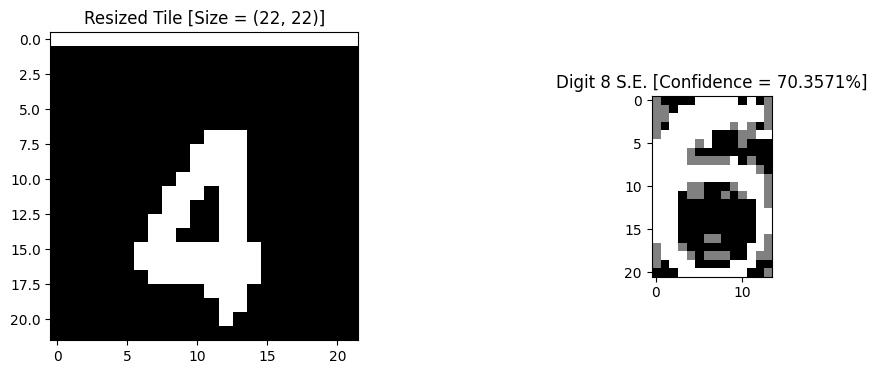

In [24]:
fig = plt.figure(figsize=(12, 4))
gs = plt.GridSpec(5, 2)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[1:4, 1])

tile = tiles[0*9 + 7]  # First tile whose value is 8
se = digit_ses[5]  # S.E. for digit 8

max_confidence = -100
max_confidence_se = None
# print(tile.shape[0])
# print(se.shape[0])
# To obtain scale-invariance, let's try different input sizes
for h in range(tile.shape[0], se.shape[0], -1):
    y, x = tile.shape
    resized_tile = cv2.resize(tile, ((h*x)//y, h), cv2.INTER_NEAREST)
    resized_tile = cv2.threshold(resized_tile, 1, 255, cv2.THRESH_BINARY)[1]
    confidence = se_match(se, resized_tile)
    if confidence >= max_confidence:
        max_confidence = confidence
        max_confidence_se = se

ax1.imshow(resized_tile, cmap="gray");
ax1.set_title(f"Resized Tile [Size = {resized_tile.shape}]");
ax2.imshow(max_confidence_se, cmap="gray", vmin=-1, vmax=1);
ax2.set_title(f"Digit 8 S.E. [Confidence = {round(100*max_confidence, 4)}%]");

Comparing 8 0.07178217821782178
{1: 0.636986301369863, 2: 0.7694805194805194, 3: 0.8193069306930693, 4: 0.721875, 5: 0.8351063829787234, 6: 0.7946428571428571, 7: 0.6975806451612904, 8: 0.8693181818181818, 9: 0.7277227722772277}
Max confidence till now 0.8693181818181818 with digit 8
Showing final qarar 0.8693181818181818 8


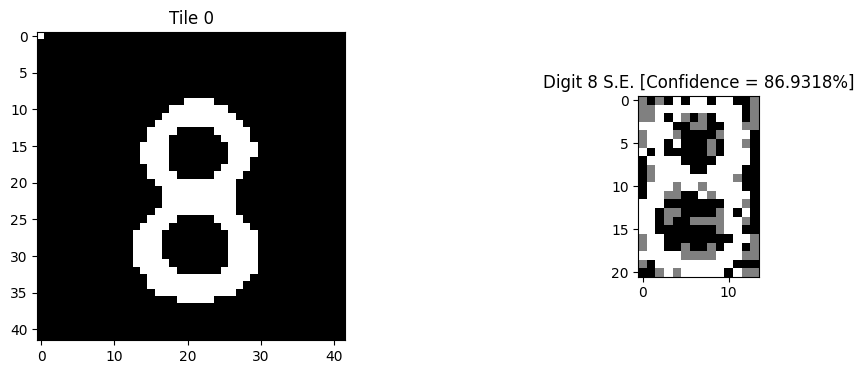

Comparing 1 0
{}
Max confidence till now 0 with digit 1


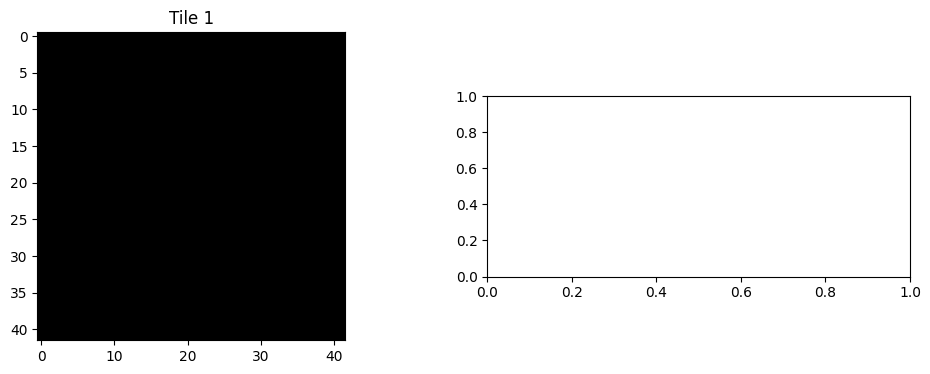

Comparing 1 0
{}
Max confidence till now 0 with digit 1


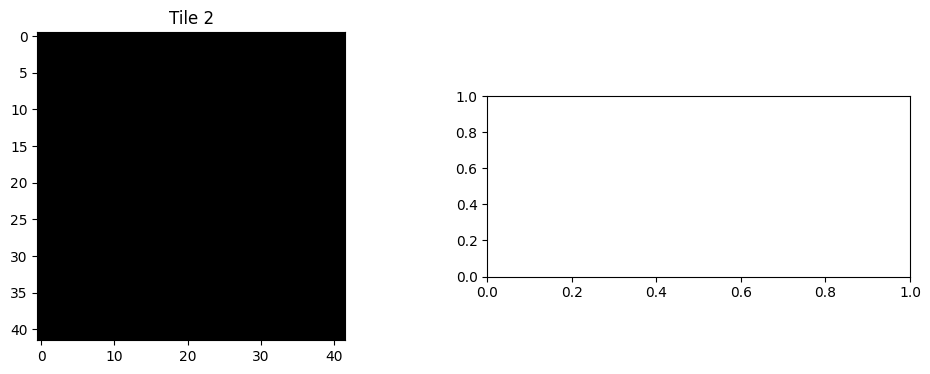

Comparing 1 0
{}
Max confidence till now 0 with digit 1


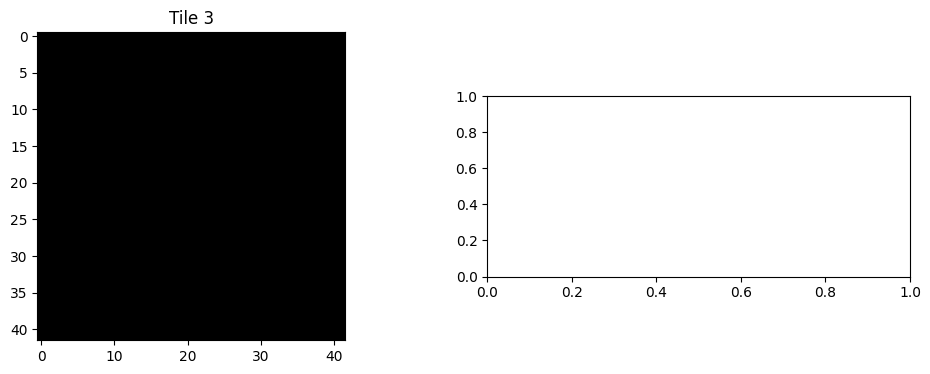

Comparing 1 0
{}
Max confidence till now 0 with digit 1


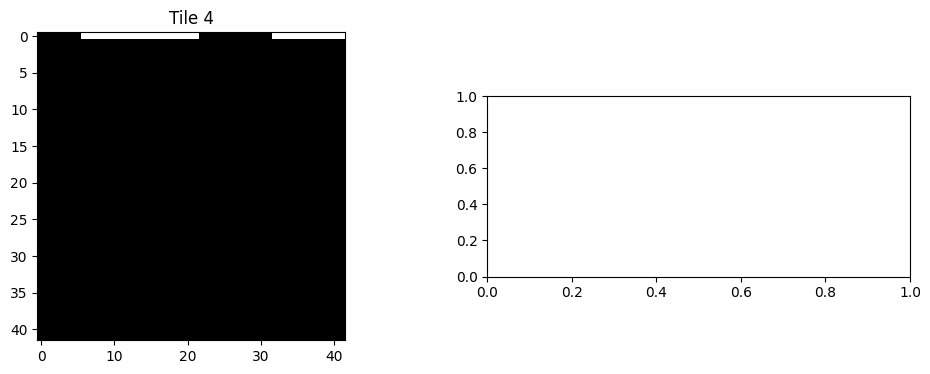

Comparing 1 0
{}
Max confidence till now 0 with digit 1


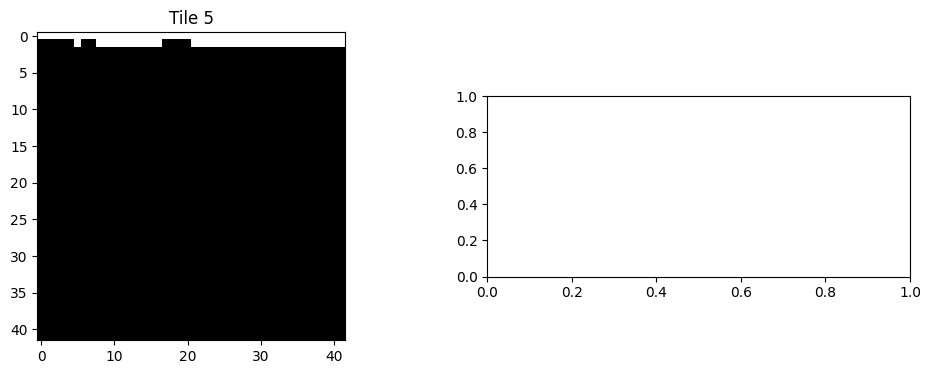

Comparing 1 0
{}
Max confidence till now 0 with digit 1


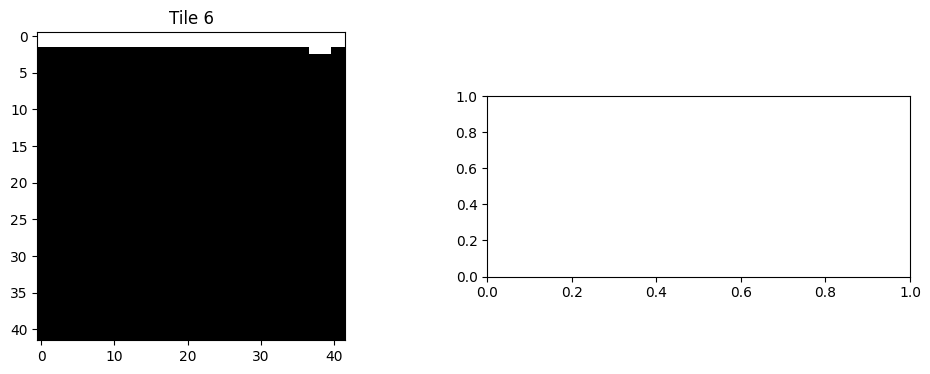

Comparing 4 0.06683168316831684
{1: 0.75, 2: 0.5714285714285714, 3: 0.6089108910891089, 4: 0.796875, 5: 0.6409574468085106, 6: 0.7035714285714286, 7: 0.45564516129032256, 8: 0.6931818181818182, 9: 0.6311881188118812}
Max confidence till now 0.796875 with digit 4
Showing final qarar 0.796875 4


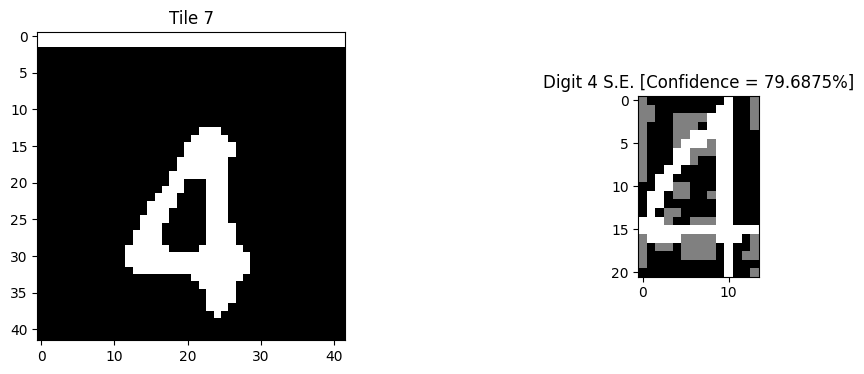

Comparing 1 0
{}
Max confidence till now 0 with digit 1


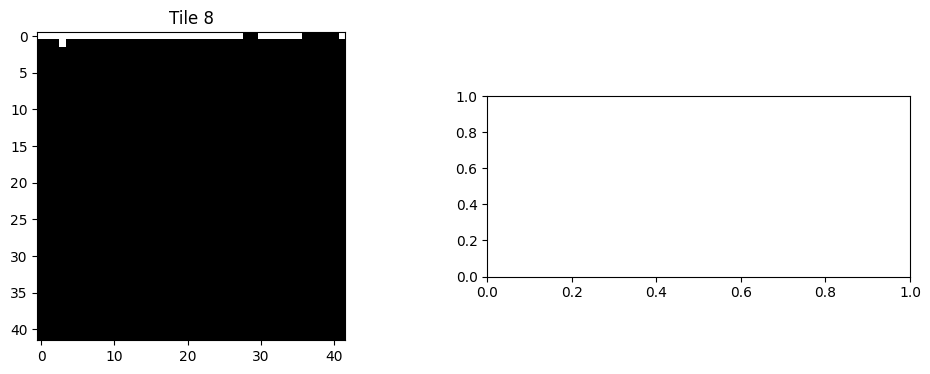

Comparing 1 0
{}
Max confidence till now 0 with digit 1


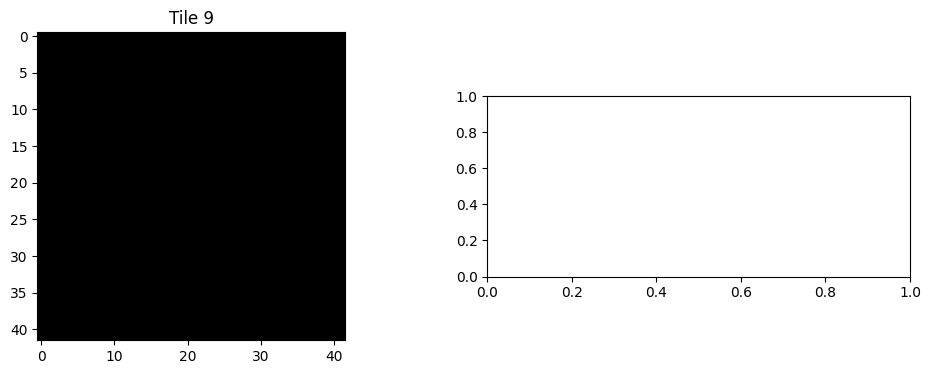

Comparing 1 0
{}
Max confidence till now 0 with digit 1


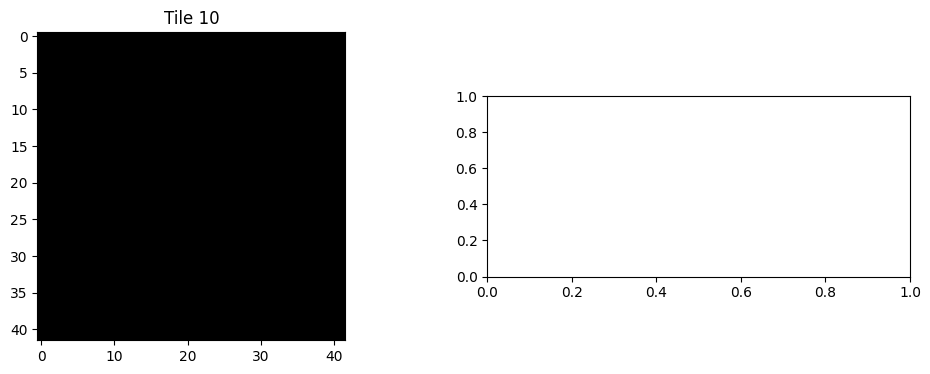

{1: 0.6198630136986302, 2: 0.6266233766233766, 3: 0.6658415841584159, 4: 0.5875, 5: 0.648936170212766, 6: 0.5910714285714286, 7: 0.5766129032258065, 8: 0.6420454545454546, 9: 0.5792079207920792}
Max confidence till now 0.6658415841584159 with digit 3
Showing final qarar 0.6658415841584159 3


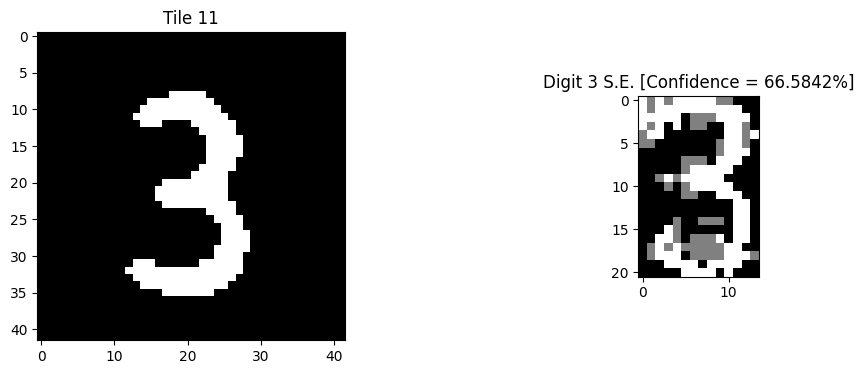

{1: 0.4726027397260274, 2: 0.5584415584415584, 3: 0.6584158415841584, 4: 0.54375, 5: 0.7553191489361702, 6: 0.7964285714285714, 7: 0.4314516129032258, 8: 0.740530303030303, 9: 0.6014851485148515}
Max confidence till now 0.7964285714285714 with digit 6
Showing final qarar 0.7964285714285714 6


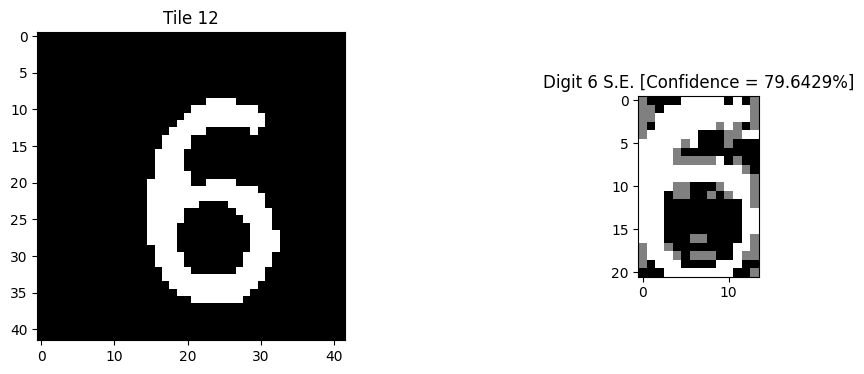

Comparing 1 0
{}
Max confidence till now 0 with digit 1


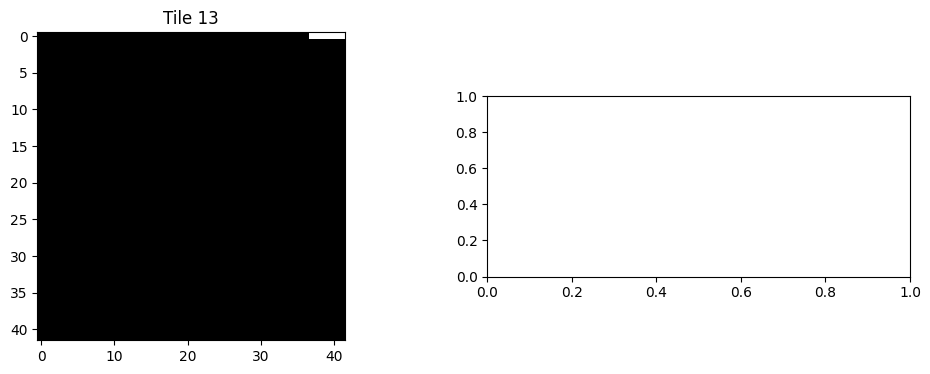

Comparing 1 0
{}
Max confidence till now 0 with digit 1


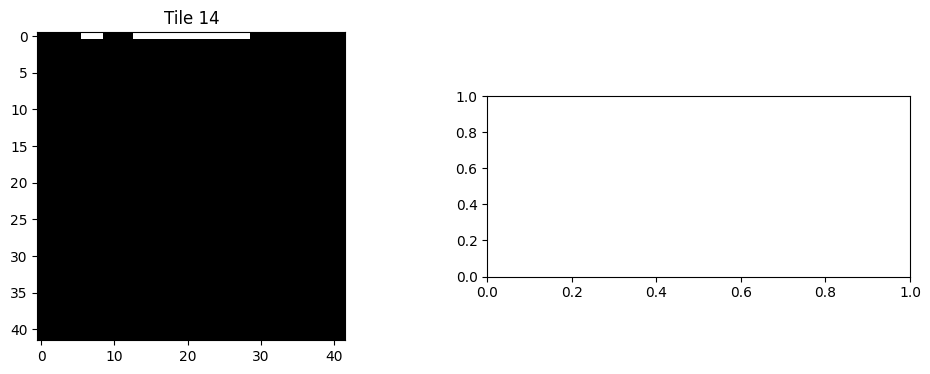

Comparing 1 0
{}
Max confidence till now 0 with digit 1


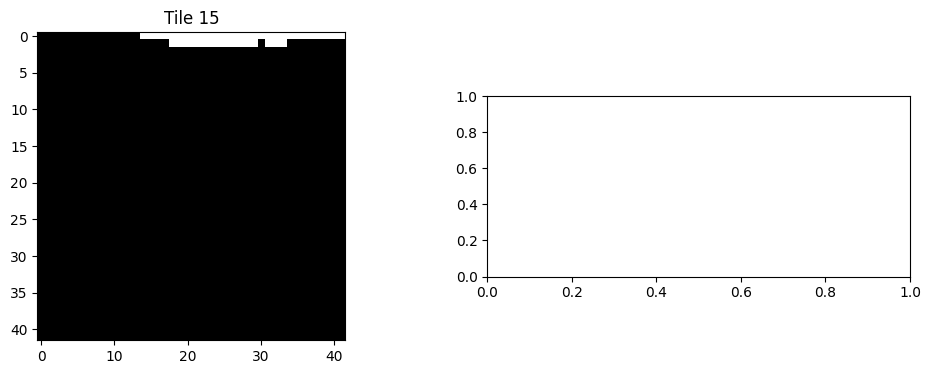

Comparing 1 0
{}
Max confidence till now 0 with digit 1


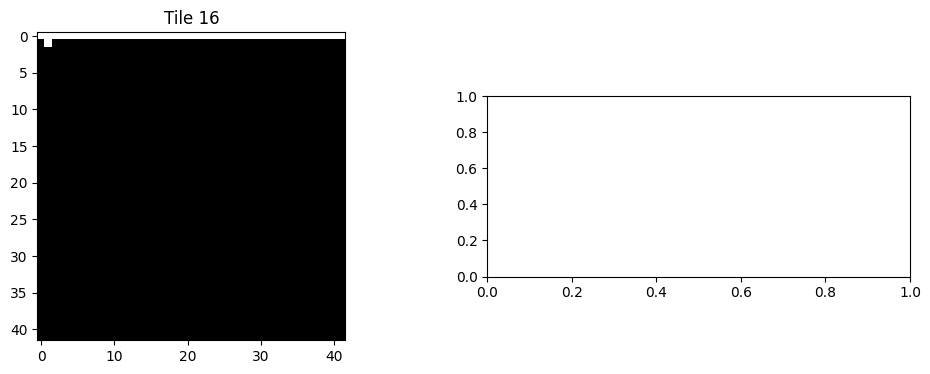

Comparing 1 0
{}
Max confidence till now 0 with digit 1


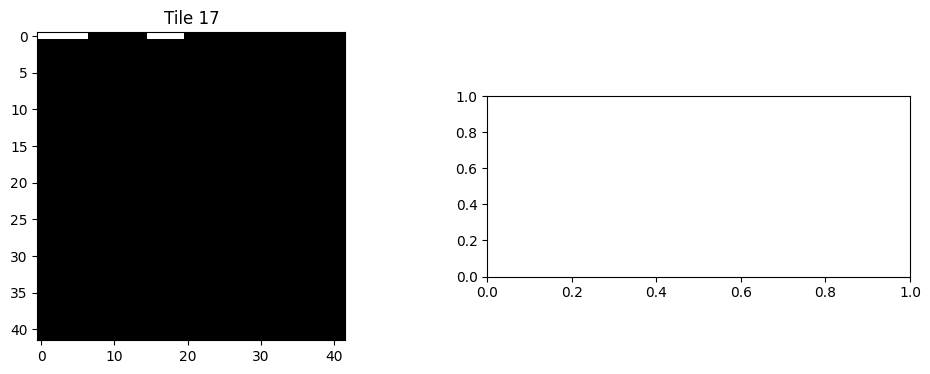

Comparing 1 0
{}
Max confidence till now 0 with digit 1


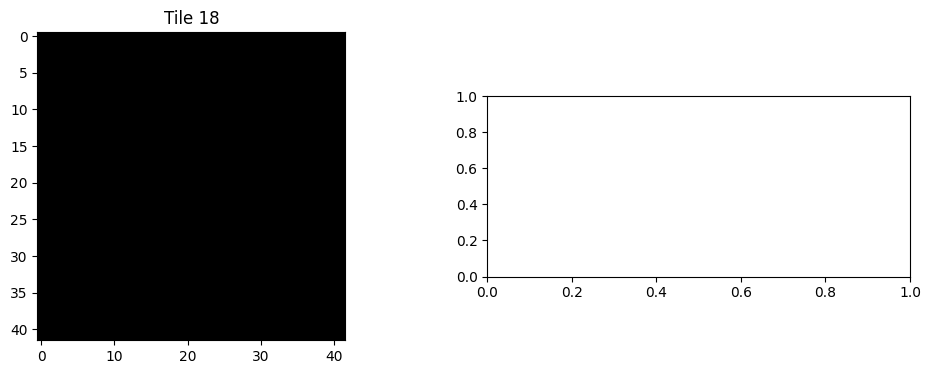

{1: 0.4520547945205479, 2: 0.4512987012987013, 3: 0.48514851485148514, 4: 0.29375, 5: 0.35904255319148937, 6: 0.4, 7: 0.5483870967741935, 8: 0.42424242424242425, 9: 0.4900990099009901}
Max confidence till now 0.5483870967741935 with digit 7
Showing final qarar 0.5483870967741935 7


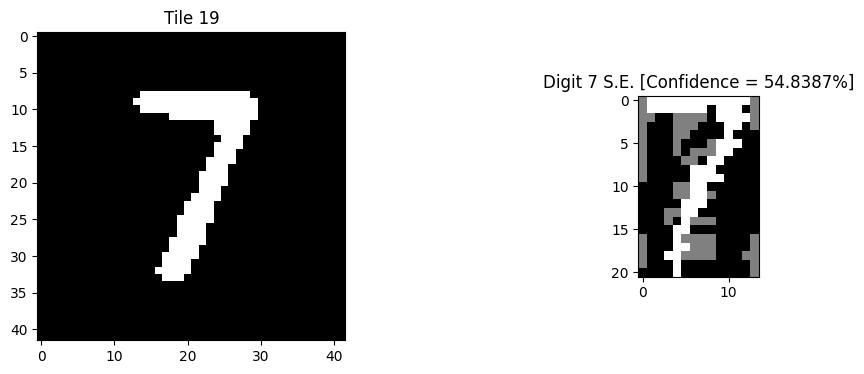

Comparing 1 0
{}
Max confidence till now 0 with digit 1


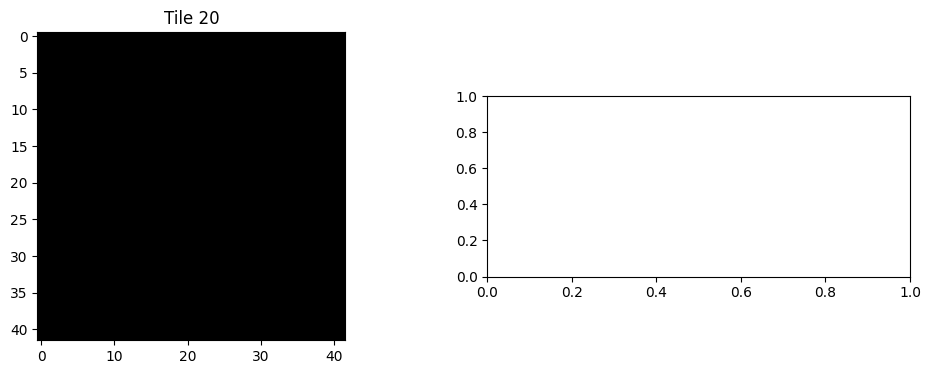

Comparing 1 0
{}
Max confidence till now 0 with digit 1


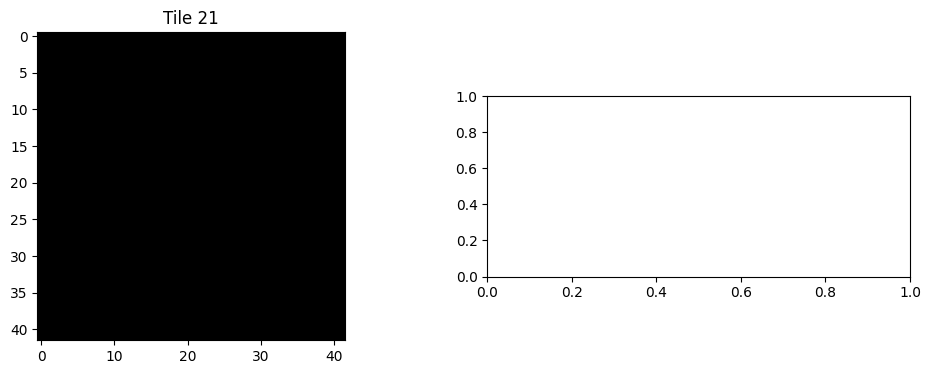

{1: 0.589041095890411, 2: 0.672077922077922, 3: 0.6386138613861386, 4: 0.584375, 5: 0.6622340425531915, 6: 0.6160714285714286, 7: 0.4959677419354839, 8: 0.7026515151515151, 9: 0.7648514851485149}
Max confidence till now 0.7648514851485149 with digit 9
Showing final qarar 0.7648514851485149 9


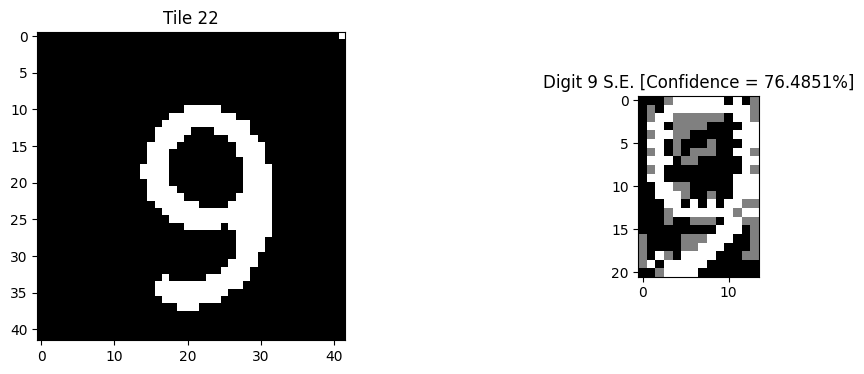

Comparing 1 0
{}
Max confidence till now 0 with digit 1


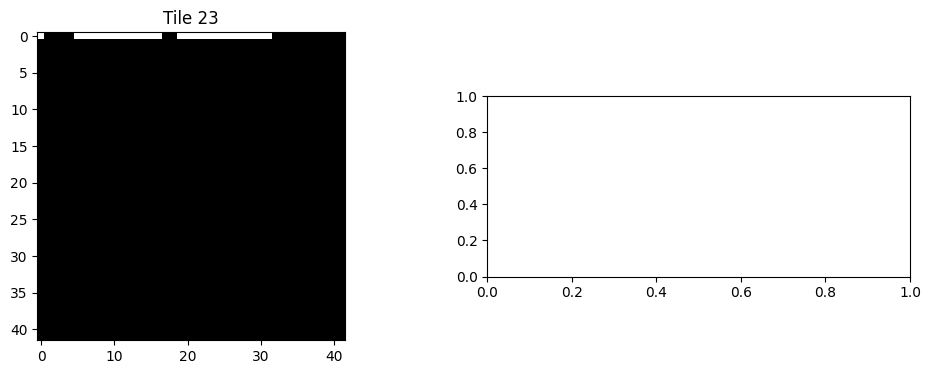

{1: 0.4315068493150685, 2: 0.6461038961038961, 3: 0.4777227722772277, 4: 0.4125, 5: 0.3670212765957447, 6: 0.41785714285714287, 7: 0.5362903225806451, 8: 0.45075757575757575, 9: 0.5173267326732673}
Max confidence till now 0.6461038961038961 with digit 2
Showing final qarar 0.6461038961038961 2


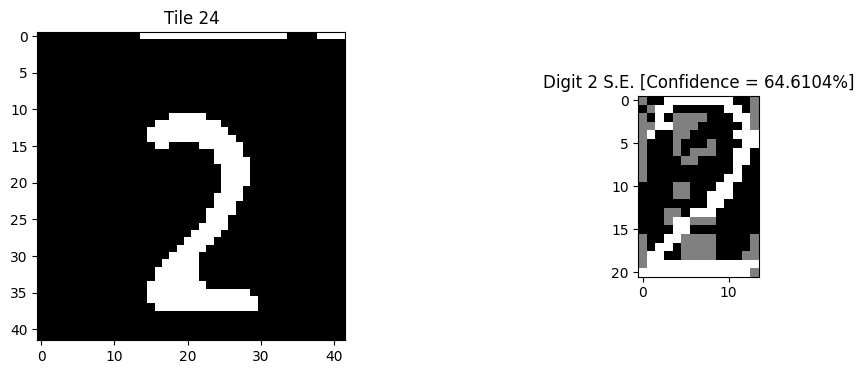

Comparing 1 0
{}
Max confidence till now 0 with digit 1


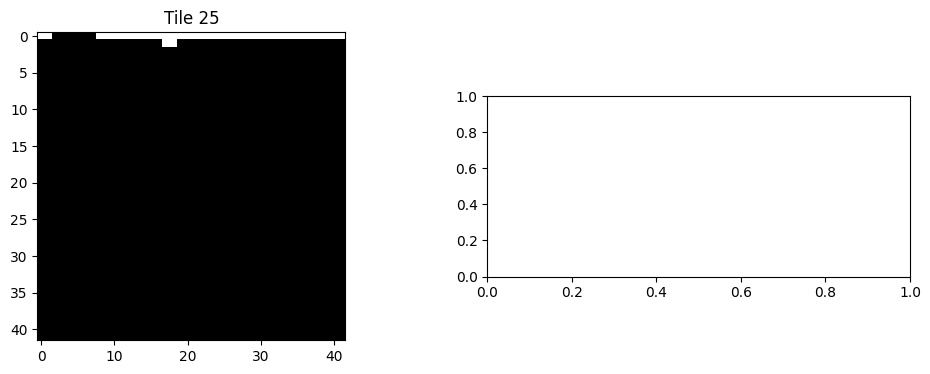

{1: 0.5787671232876712, 2: 0.5844155844155844, 3: 0.6658415841584159, 4: 0.51875, 5: 0.6063829787234043, 6: 0.5053571428571428, 7: 0.5282258064516129, 8: 0.6041666666666666, 9: 0.5099009900990099}
Max confidence till now 0.6658415841584159 with digit 3
Showing final qarar 0.6658415841584159 3


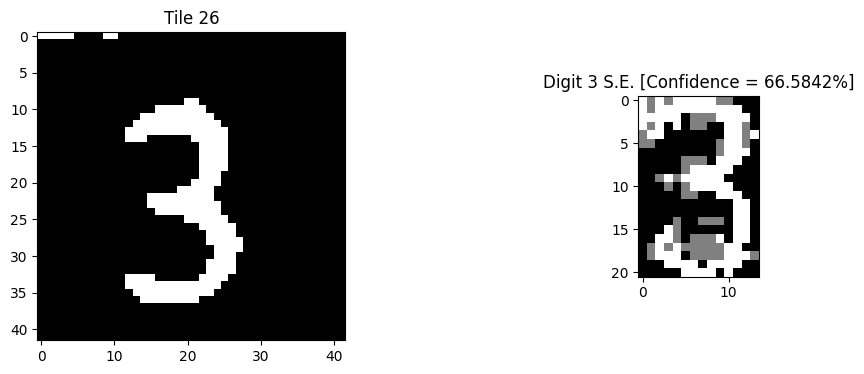

Comparing 1 0
{}
Max confidence till now 0 with digit 1


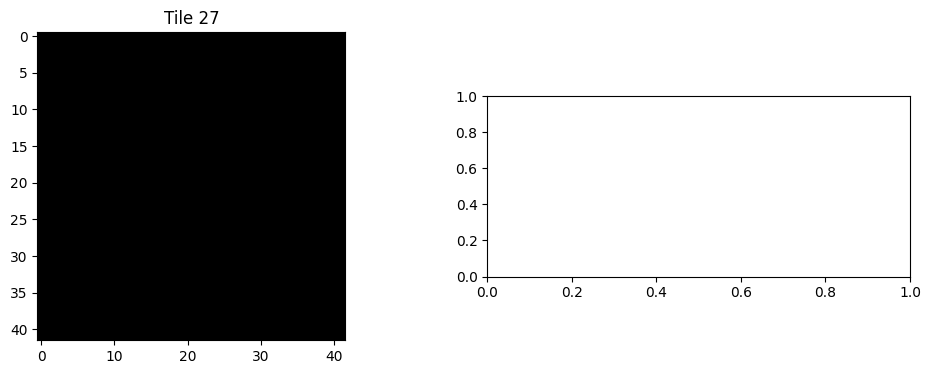

{1: 0.3972602739726027, 2: 0.461038961038961, 3: 0.5693069306930693, 4: 0.453125, 5: 0.7101063829787234, 6: 0.5892857142857143, 7: 0.34274193548387094, 8: 0.6079545454545454, 9: 0.5148514851485149}
Max confidence till now 0.7101063829787234 with digit 5
Showing final qarar 0.7101063829787234 5


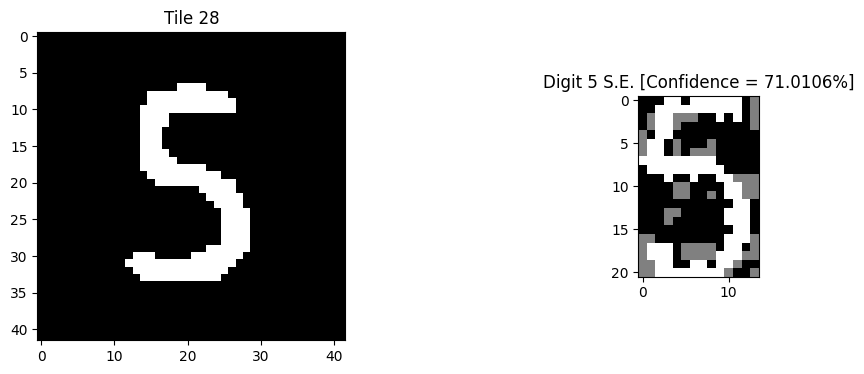

Comparing 1 0
{}
Max confidence till now 0 with digit 1


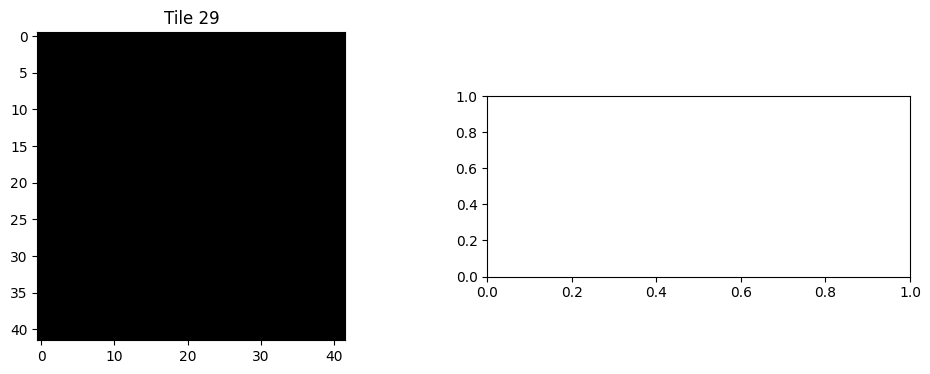

Comparing 1 0
{}
Max confidence till now 0 with digit 1


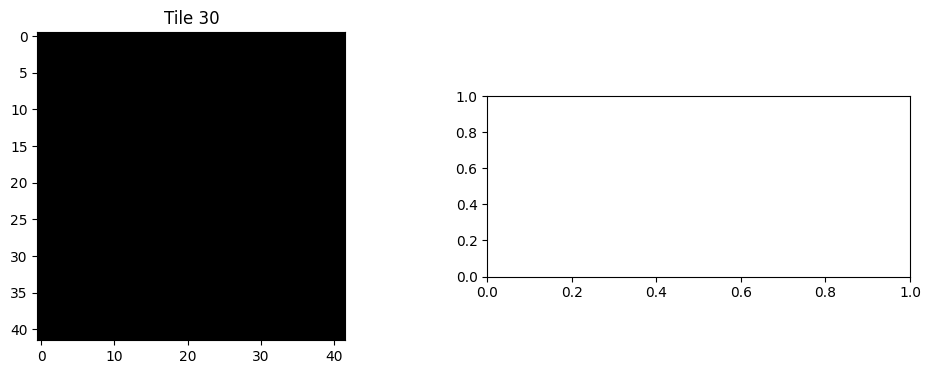

Comparing 1 0
{}
Max confidence till now 0 with digit 1


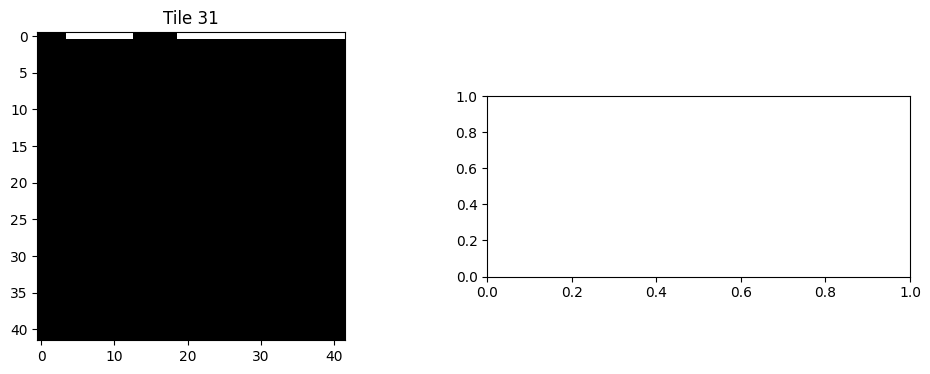

{1: 0.4486301369863014, 2: 0.4253246753246753, 3: 0.4628712871287129, 4: 0.30625, 5: 0.38563829787234044, 6: 0.38392857142857145, 7: 0.532258064516129, 8: 0.4375, 9: 0.5297029702970297}
Max confidence till now 0.532258064516129 with digit 7
Showing final qarar 0.532258064516129 7


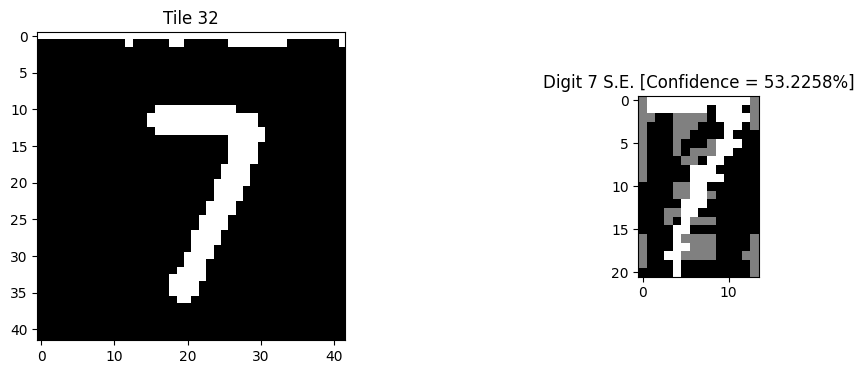

Comparing 1 0
{}
Max confidence till now 0 with digit 1


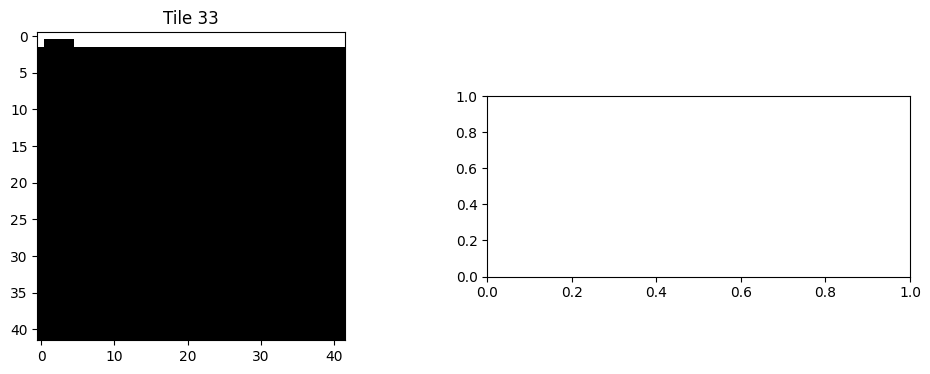

Comparing 1 0
{}
Max confidence till now 0 with digit 1


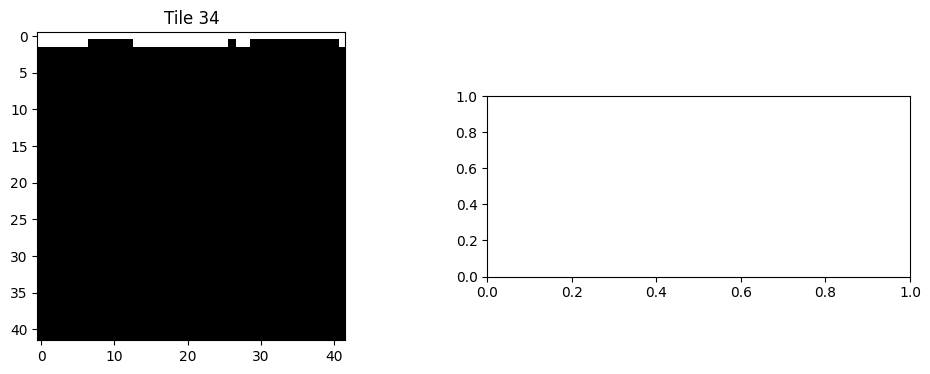

Comparing 1 0
{}
Max confidence till now 0 with digit 1


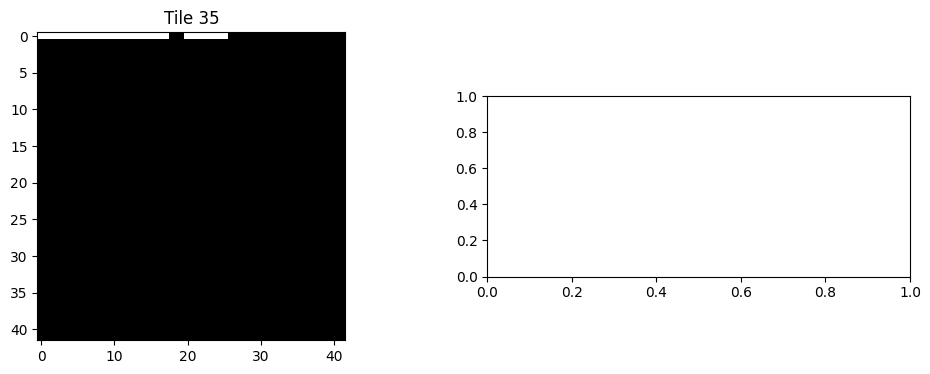

Comparing 1 0
{}
Max confidence till now 0 with digit 1


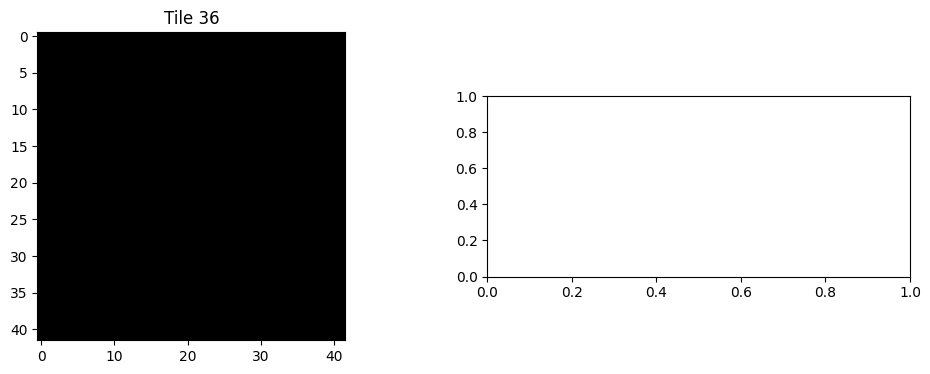

Comparing 1 0
{}
Max confidence till now 0 with digit 1


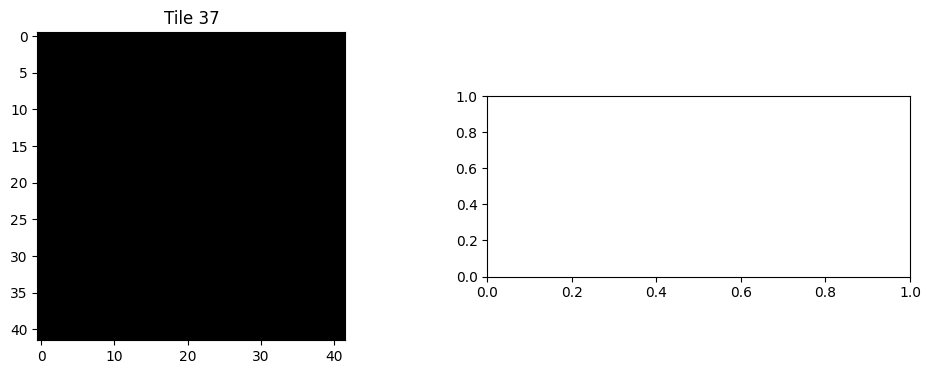

Comparing 1 0
{}
Max confidence till now 0 with digit 1


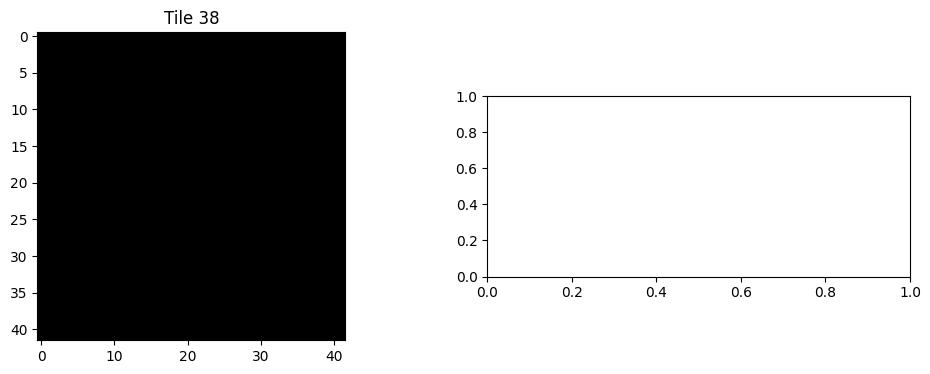

Comparing 1 0
{}
Max confidence till now 0 with digit 1


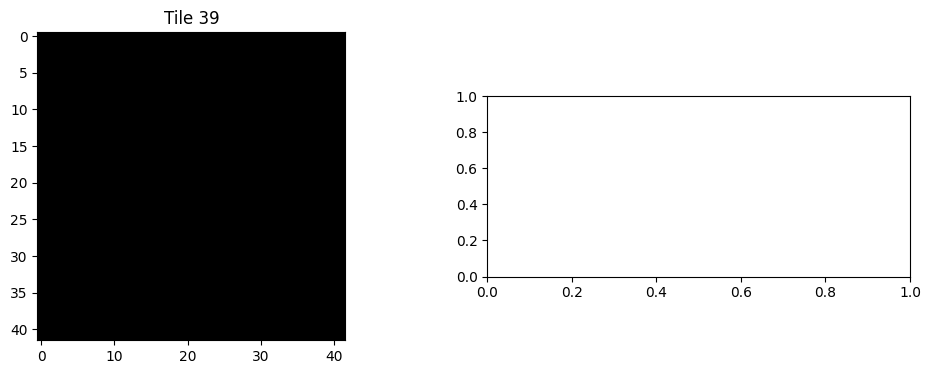

Comparing 4 0.009900990099009901
{1: 0.75, 2: 0.5714285714285714, 3: 0.6262376237623762, 4: 0.79375, 5: 0.6595744680851063, 6: 0.7232142857142857, 7: 0.5201612903225806, 8: 0.7253787878787878, 9: 0.6707920792079208}
Max confidence till now 0.79375 with digit 4
Showing final qarar 0.79375 4


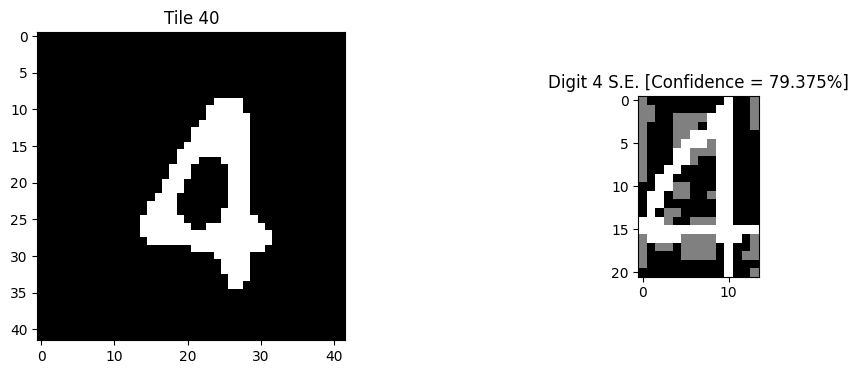

{1: 0.3904109589041096, 2: 0.44805194805194803, 3: 0.5915841584158416, 4: 0.45625, 5: 0.7101063829787234, 6: 0.6285714285714286, 7: 0.3387096774193548, 8: 0.6287878787878788, 9: 0.504950495049505}
Max confidence till now 0.7101063829787234 with digit 5
Showing final qarar 0.7101063829787234 5


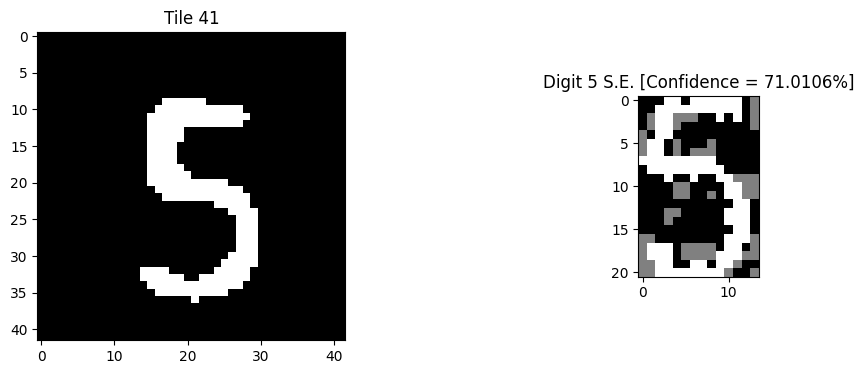

{1: 0.4075342465753425, 2: 0.4253246753246753, 3: 0.452970297029703, 4: 0.259375, 5: 0.32978723404255317, 6: 0.375, 7: 0.5282258064516129, 8: 0.3996212121212121, 9: 0.48514851485148514}
Max confidence till now 0.5282258064516129 with digit 7
Showing final qarar 0.5282258064516129 7


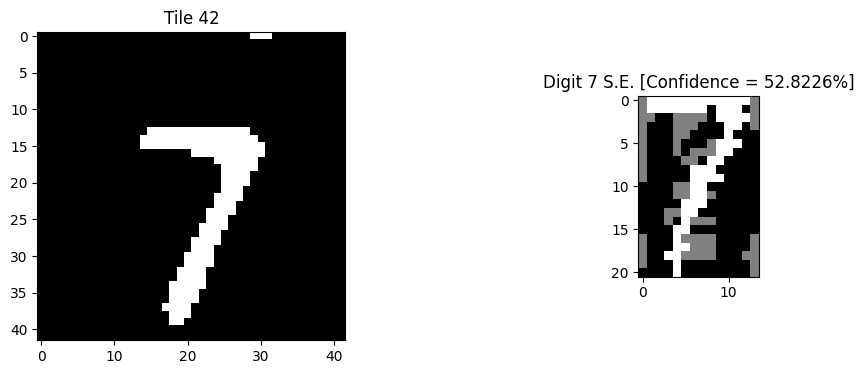

Comparing 1 0
{}
Max confidence till now 0 with digit 1


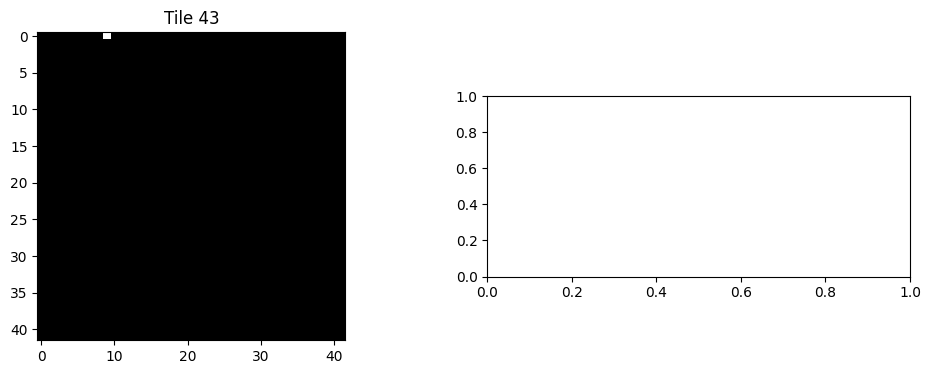

Comparing 1 0
{}
Max confidence till now 0 with digit 1


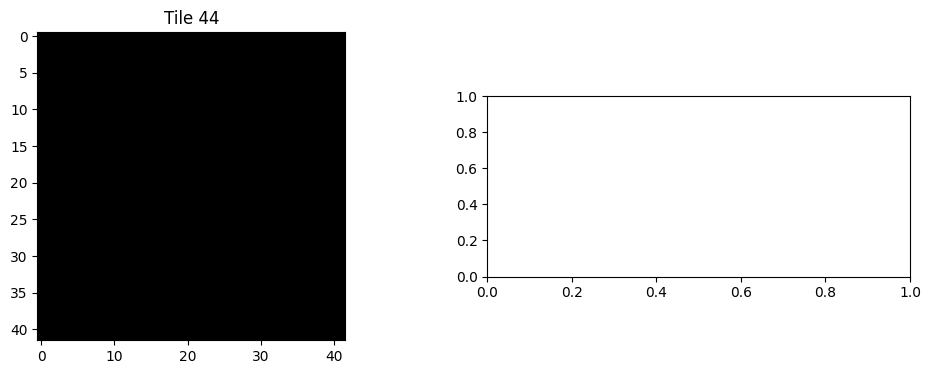

{1: 0.4178082191780822, 2: 0.6266233766233766, 3: 0.48514851485148514, 4: 0.475, 5: 0.3696808510638298, 6: 0.4035714285714286, 7: 0.5241935483870968, 8: 0.4583333333333333, 9: 0.5148514851485149}
Max confidence till now 0.6266233766233766 with digit 2
Showing final qarar 0.6266233766233766 2


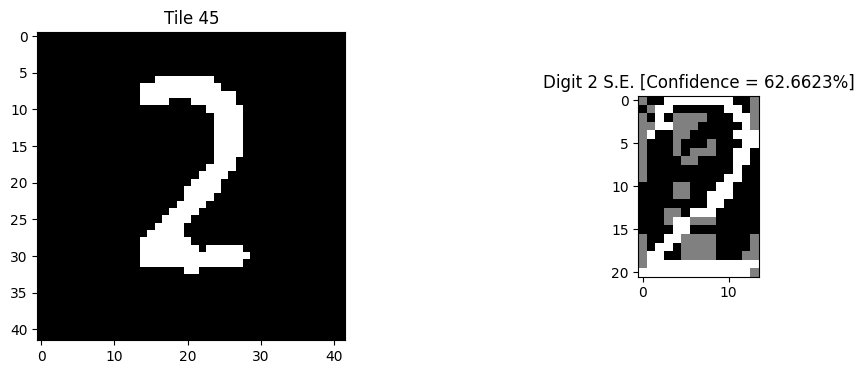

Comparing 1 0
{}
Max confidence till now 0 with digit 1


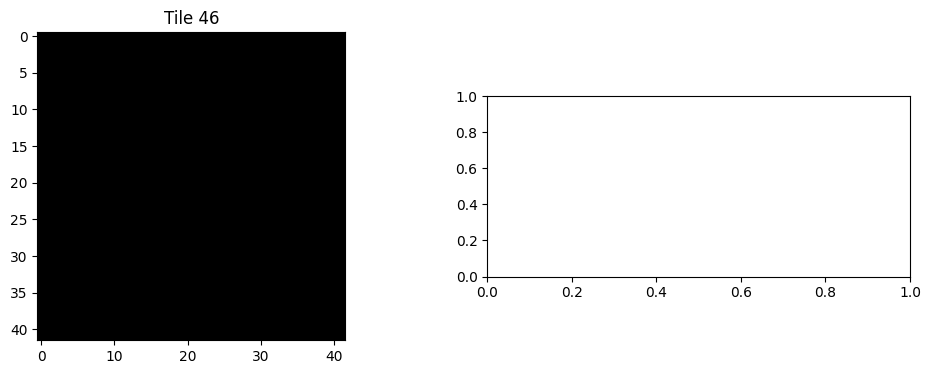

Comparing 1 0
{}
Max confidence till now 0 with digit 1


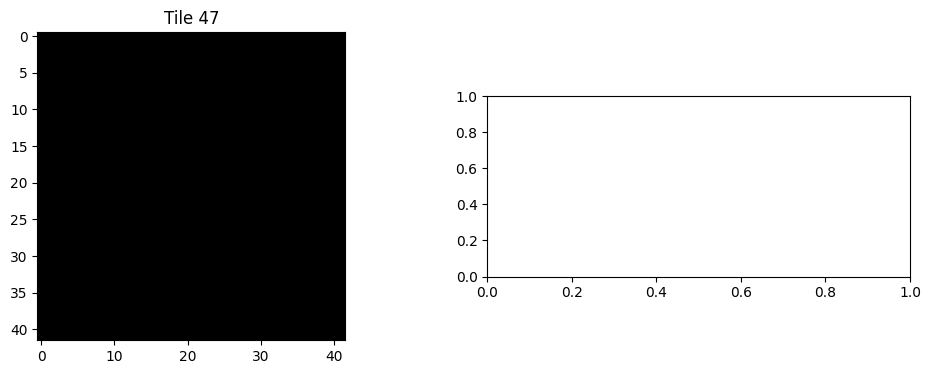

Comparing 1 0
{1: 0.5376712328767124, 2: 0.4383116883116883, 3: 0.4975247524752475, 4: 0.3875, 5: 0.4574468085106383, 6: 0.41785714285714287, 7: 0.3870967741935484, 8: 0.4753787878787879, 9: 0.48267326732673266}
Max confidence till now 0.5376712328767124 with digit 1
Showing final qarar 0.5376712328767124 1


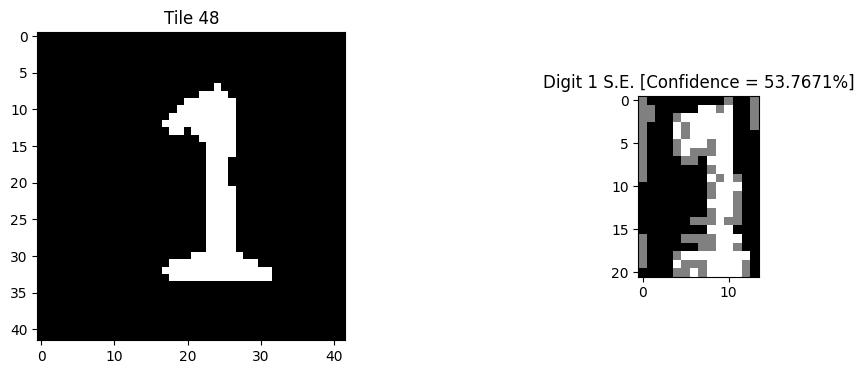

Comparing 1 0
{}
Max confidence till now 0 with digit 1


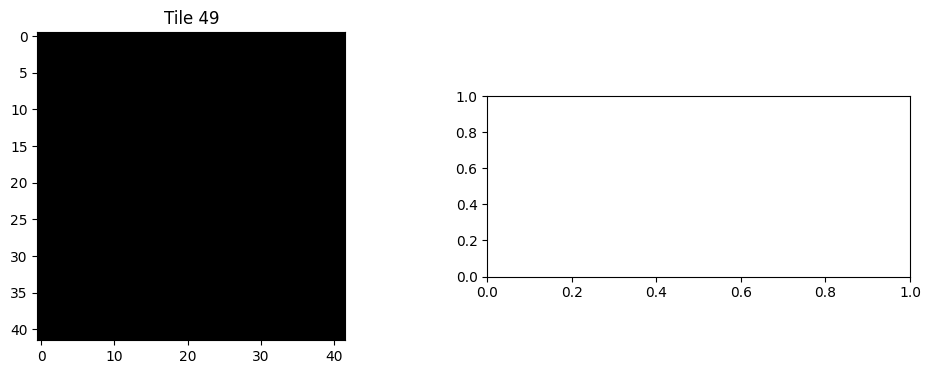

Comparing 1 0
{}
Max confidence till now 0 with digit 1


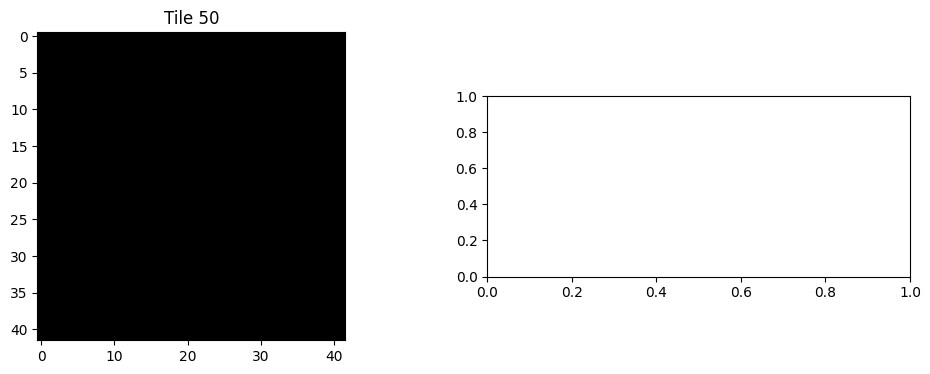

Comparing 1 0
{}
Max confidence till now 0 with digit 1


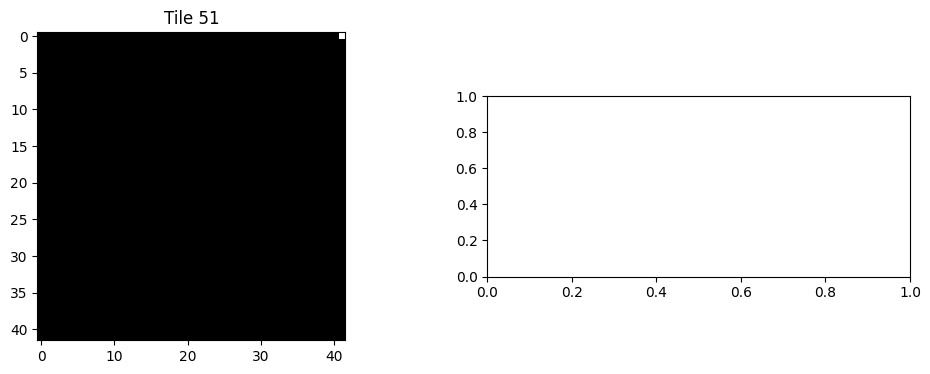

{1: 0.547945205479452, 2: 0.5811688311688312, 3: 0.6386138613861386, 4: 0.540625, 5: 0.6117021276595744, 6: 0.525, 7: 0.5483870967741935, 8: 0.6268939393939394, 9: 0.5247524752475248}
Max confidence till now 0.6386138613861386 with digit 3
Showing final qarar 0.6386138613861386 3


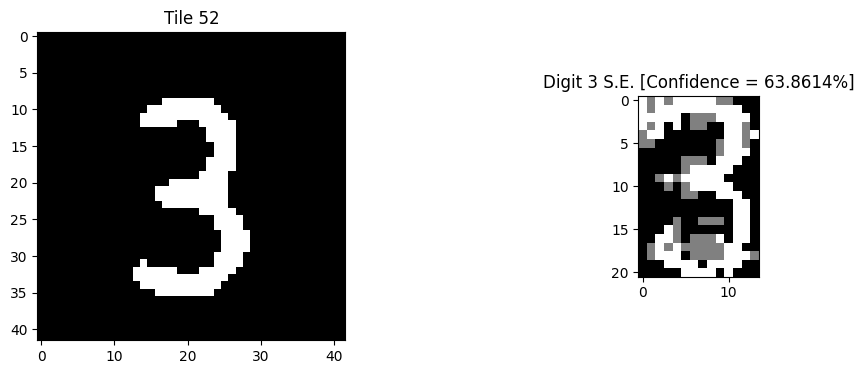

Comparing 1 0
{}
Max confidence till now 0 with digit 1


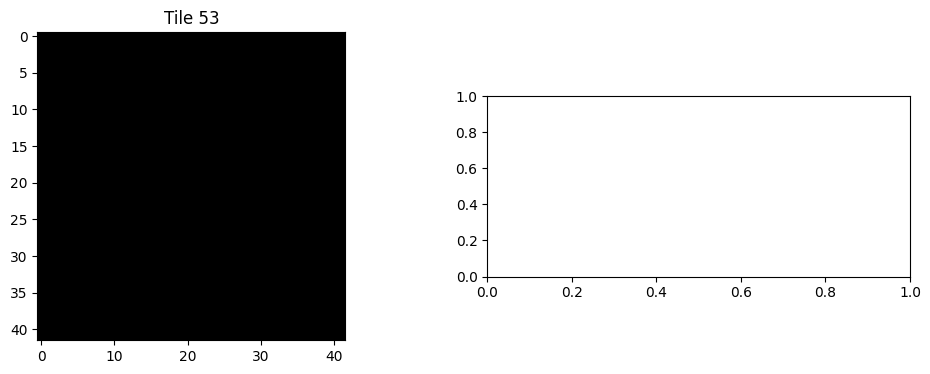

{1: 0.3732876712328767, 2: 0.41883116883116883, 3: 0.5297029702970297, 4: 0.446875, 5: 0.6569148936170213, 6: 0.5642857142857143, 7: 0.3225806451612903, 8: 0.5757575757575758, 9: 0.47029702970297027}
Max confidence till now 0.6569148936170213 with digit 5
Showing final qarar 0.6569148936170213 5


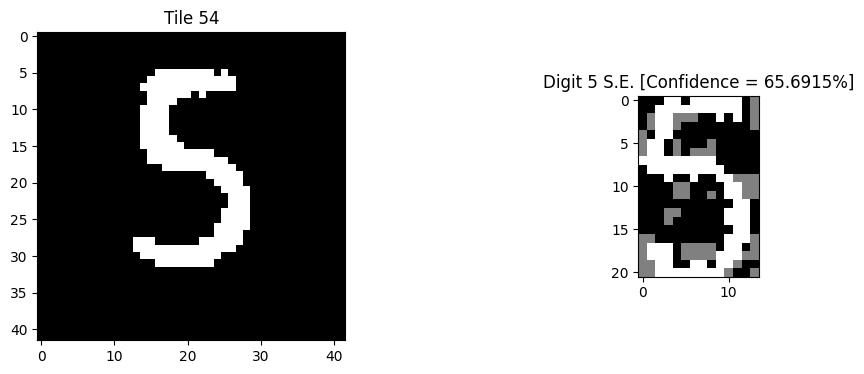

Comparing 1 0
{}
Max confidence till now 0 with digit 1


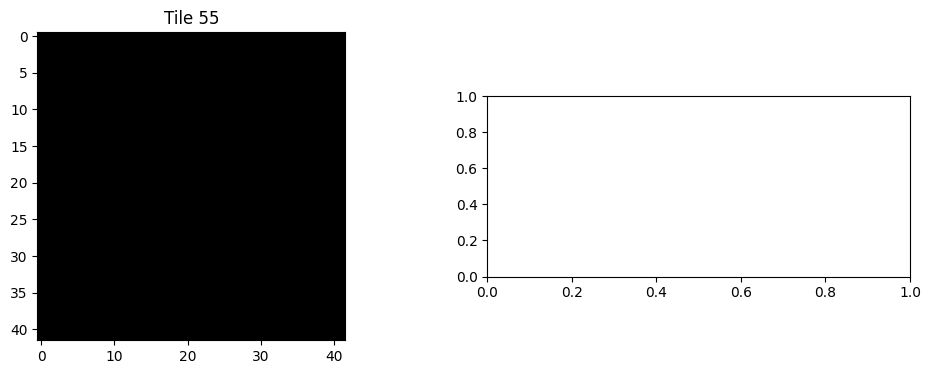

Comparing 1 0
{1: 0.5308219178082192, 2: 0.40584415584415584, 3: 0.49504950495049505, 4: 0.421875, 5: 0.42819148936170215, 6: 0.40535714285714286, 7: 0.4032258064516129, 8: 0.4678030303030303, 9: 0.4430693069306931}
Max confidence till now 0.5308219178082192 with digit 1
Showing final qarar 0.5308219178082192 1


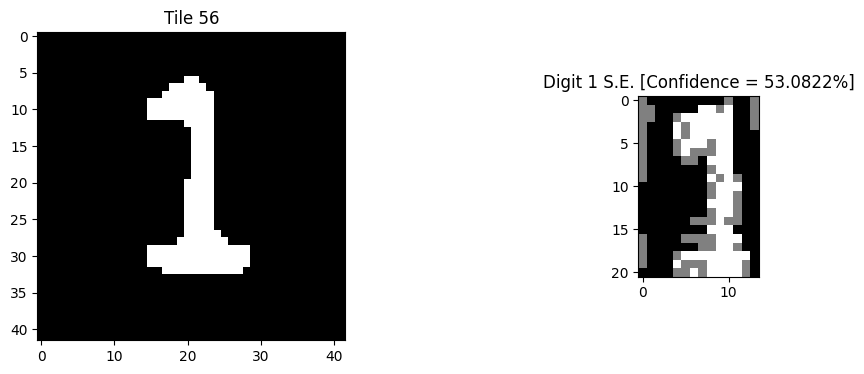

Comparing 1 0
{}
Max confidence till now 0 with digit 1


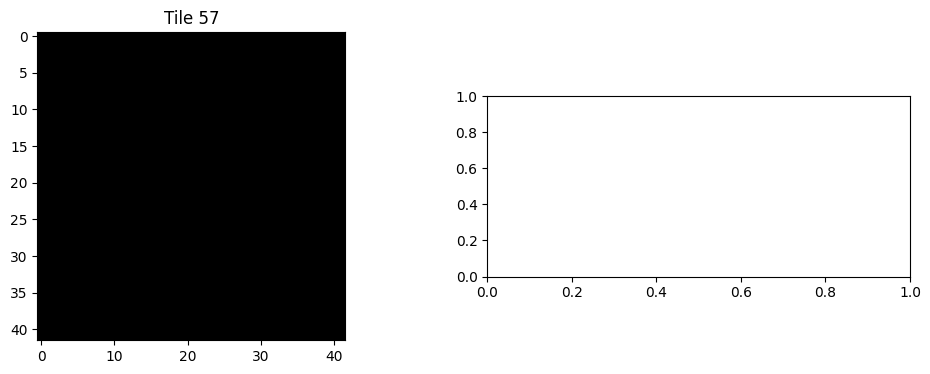

Comparing 1 0
{}
Max confidence till now 0 with digit 1


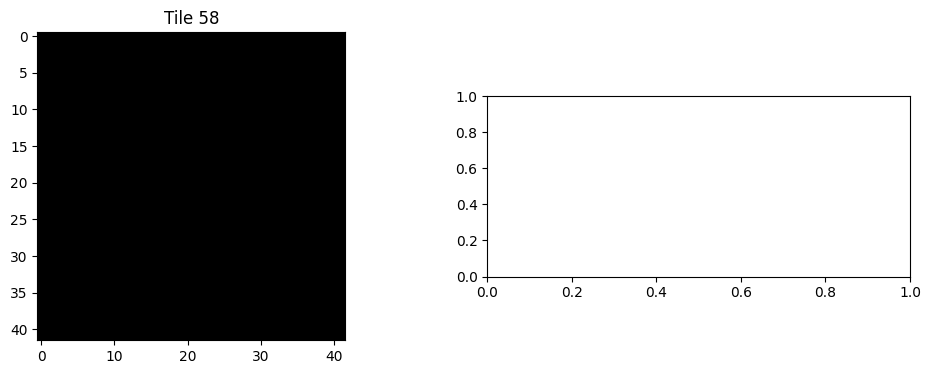

Comparing 1 0
{}
Max confidence till now 0 with digit 1


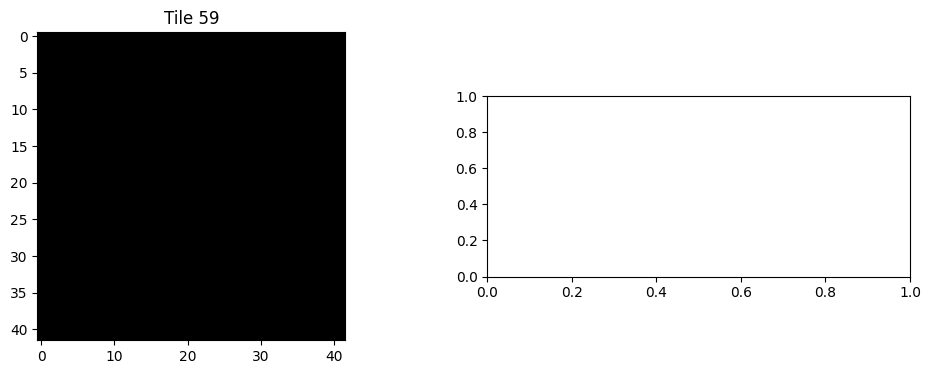

Comparing 1 0
{}
Max confidence till now 0 with digit 1


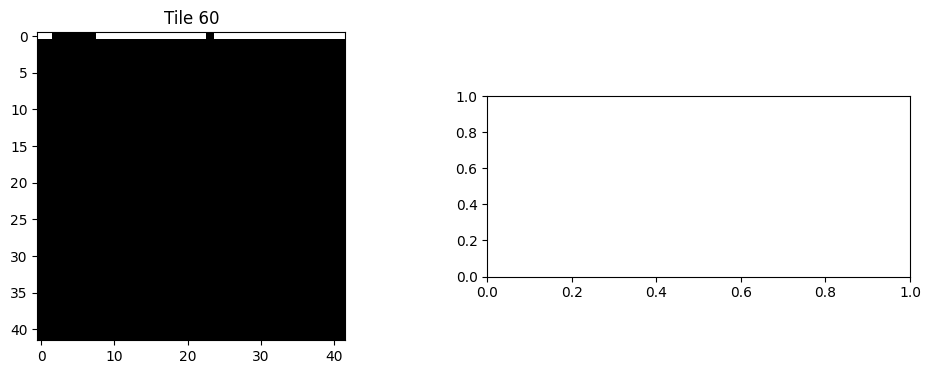

{1: 0.4212328767123288, 2: 0.525974025974026, 3: 0.6633663366336634, 4: 0.5125, 5: 0.7579787234042553, 6: 0.8017857142857143, 7: 0.4153225806451613, 8: 0.7462121212121212, 9: 0.5717821782178217}
Max confidence till now 0.8017857142857143 with digit 6
Showing final qarar 0.8017857142857143 6


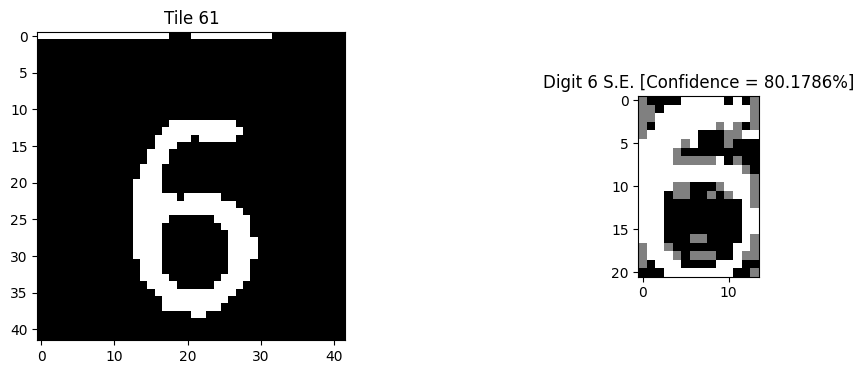

Comparing 8 0.09653465346534654
{1: 0.6678082191780822, 2: 0.7597402597402597, 3: 0.8366336633663366, 4: 0.7, 5: 0.8351063829787234, 6: 0.7821428571428571, 7: 0.7096774193548387, 8: 0.8712121212121212, 9: 0.7153465346534653}
Max confidence till now 0.8712121212121212 with digit 8
Showing final qarar 0.8712121212121212 8


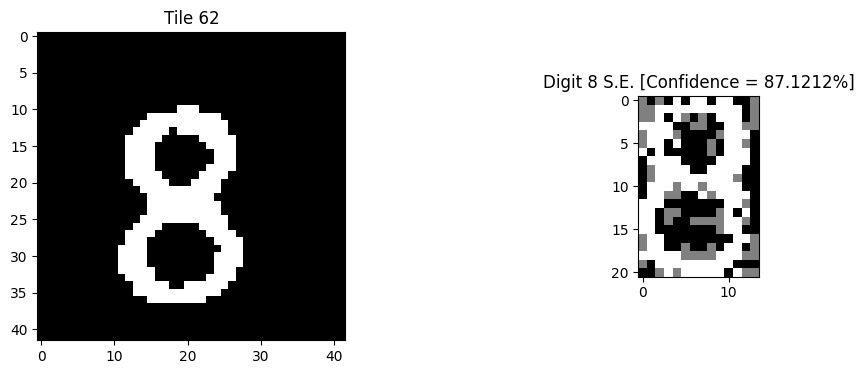

Comparing 1 0
{}
Max confidence till now 0 with digit 1


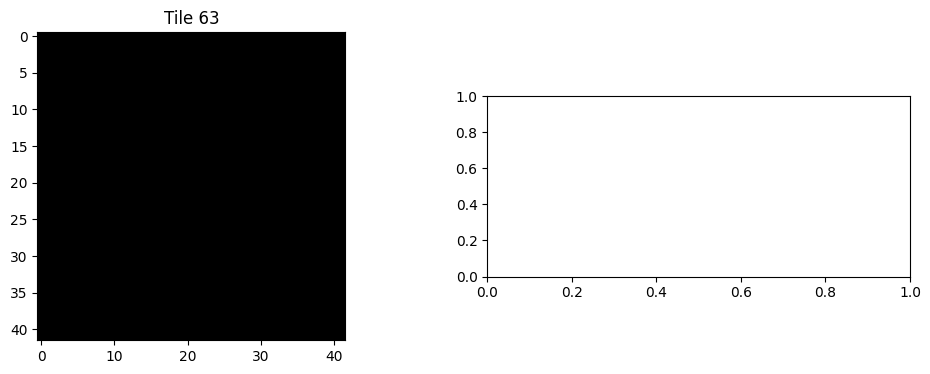

Comparing 1 0
{}
Max confidence till now 0 with digit 1


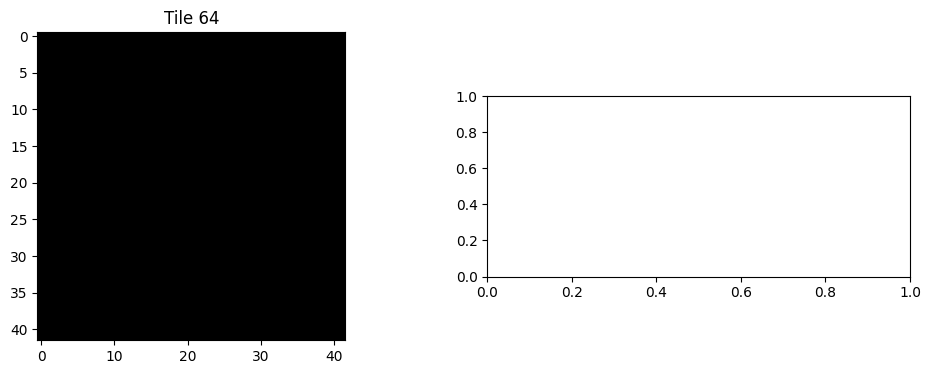

Comparing 8 0.0594059405940594
{1: 0.6575342465753424, 2: 0.7337662337662337, 3: 0.8316831683168316, 4: 0.6875, 5: 0.8324468085106383, 6: 0.7839285714285714, 7: 0.6895161290322581, 8: 0.8579545454545454, 9: 0.7004950495049505}
Max confidence till now 0.8579545454545454 with digit 8
Showing final qarar 0.8579545454545454 8


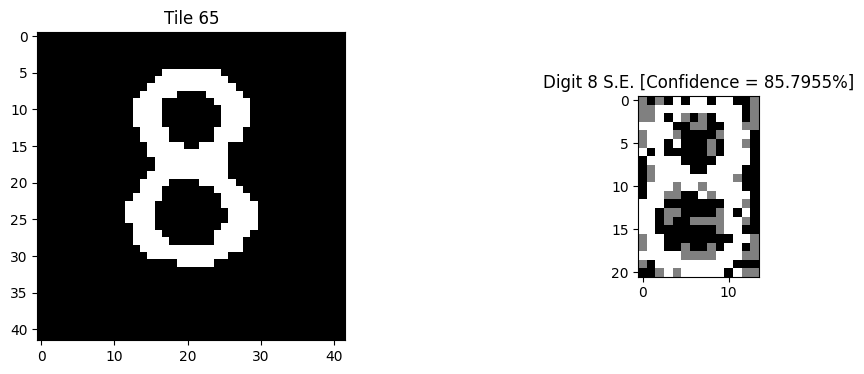

{1: 0.3938356164383562, 2: 0.474025974025974, 3: 0.5693069306930693, 4: 0.45625, 5: 0.6781914893617021, 6: 0.6196428571428572, 7: 0.3790322580645161, 8: 0.6268939393939394, 9: 0.5198019801980198}
Max confidence till now 0.6781914893617021 with digit 5
Showing final qarar 0.6781914893617021 5


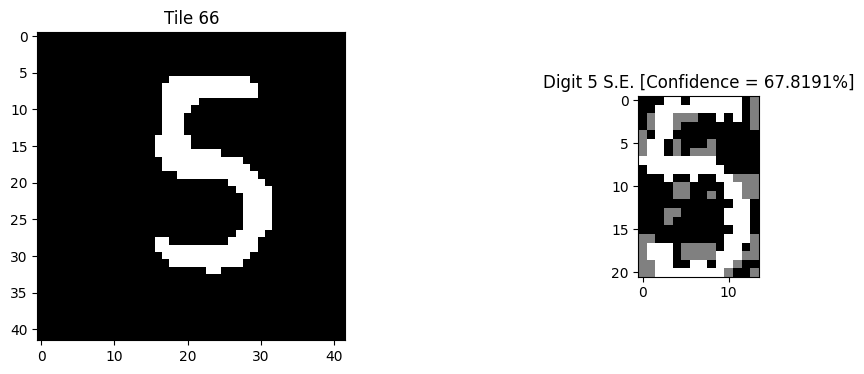

Comparing 1 0
{}
Max confidence till now 0 with digit 1


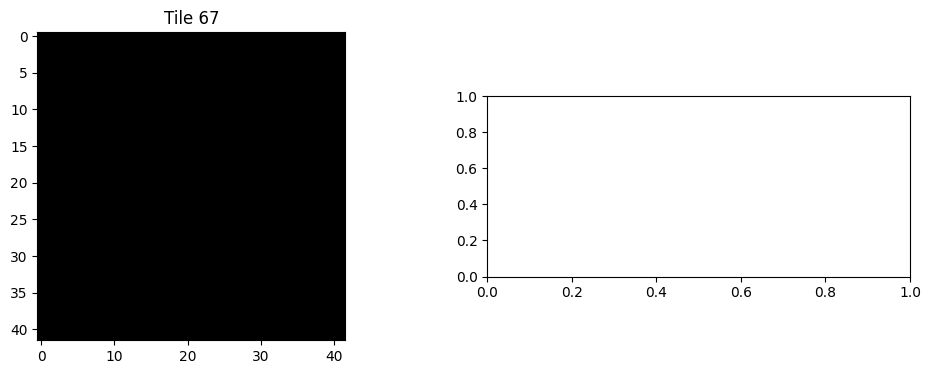

Comparing 1 0
{}
Max confidence till now 0 with digit 1


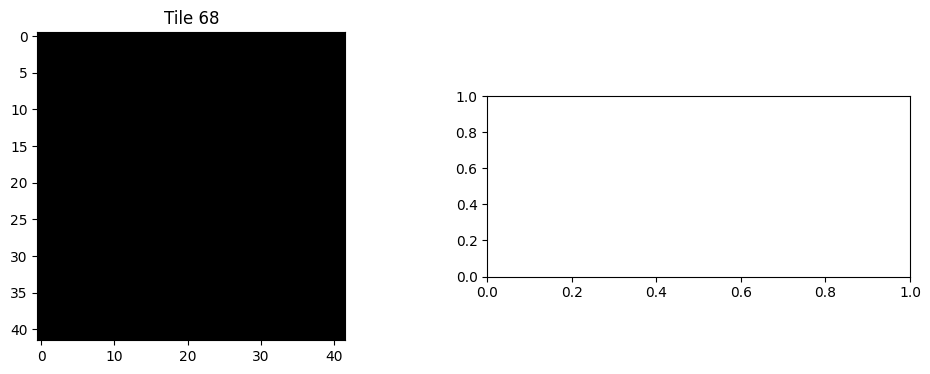

Comparing 1 0
{}
Max confidence till now 0 with digit 1


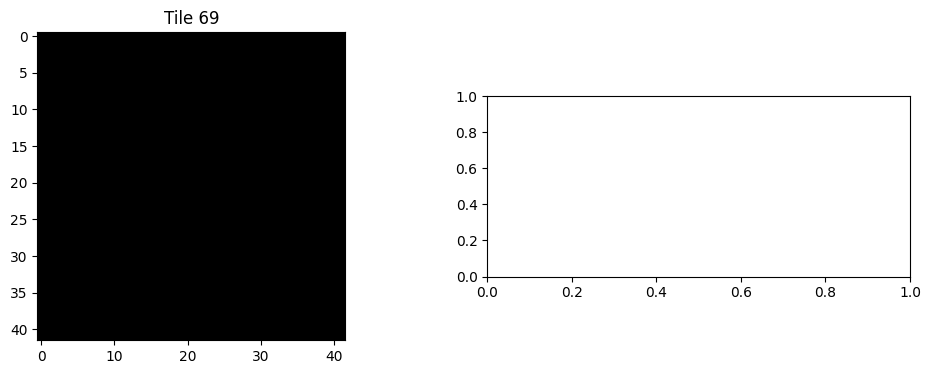

Comparing 1 0
{1: 0.541095890410959, 2: 0.40584415584415584, 3: 0.48267326732673266, 4: 0.384375, 5: 0.43617021276595747, 6: 0.39464285714285713, 7: 0.39919354838709675, 8: 0.4678030303030303, 9: 0.45792079207920794}
Max confidence till now 0.541095890410959 with digit 1
Showing final qarar 0.541095890410959 1


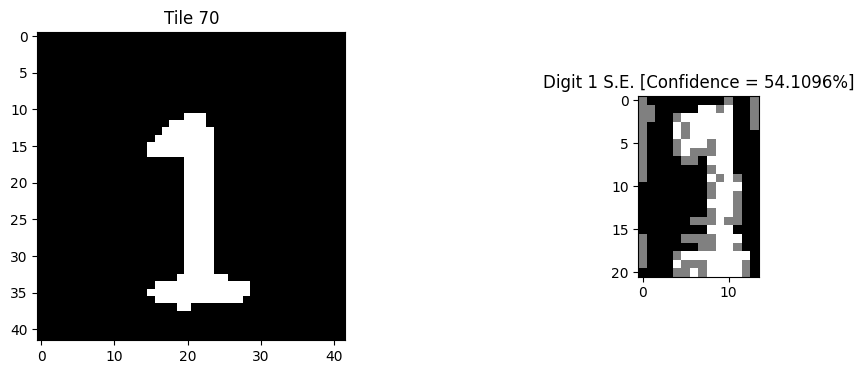

Comparing 1 0
{}
Max confidence till now 0 with digit 1


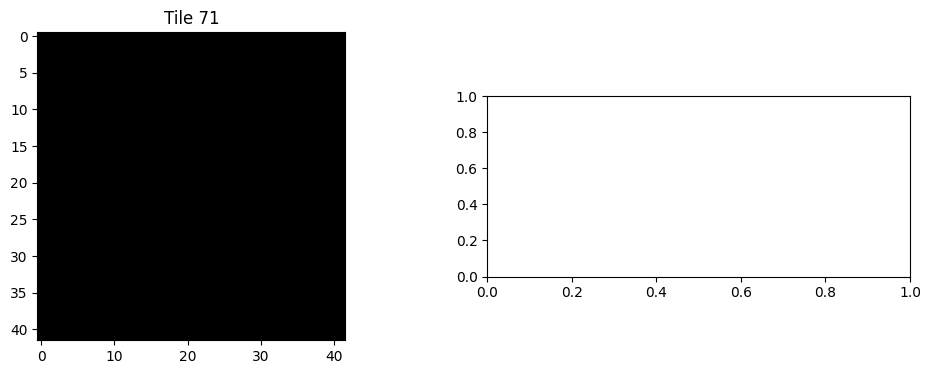

Comparing 1 0
{}
Max confidence till now 0 with digit 1


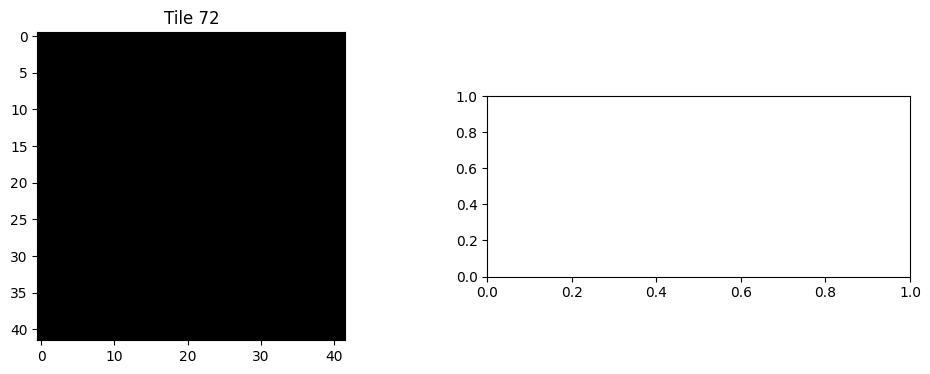

{1: 0.6267123287671232, 2: 0.6493506493506493, 3: 0.6856435643564357, 4: 0.621875, 5: 0.6622340425531915, 6: 0.6357142857142857, 7: 0.5443548387096774, 8: 0.7083333333333334, 9: 0.7673267326732673}
Max confidence till now 0.7673267326732673 with digit 9
Showing final qarar 0.7673267326732673 9


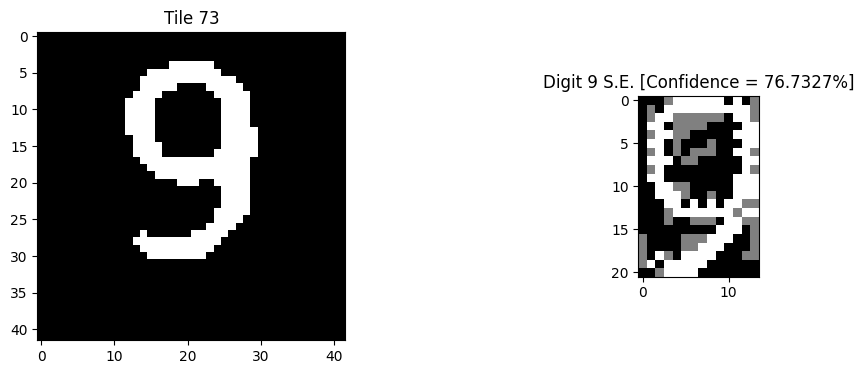

Comparing 1 0
{}
Max confidence till now 0 with digit 1


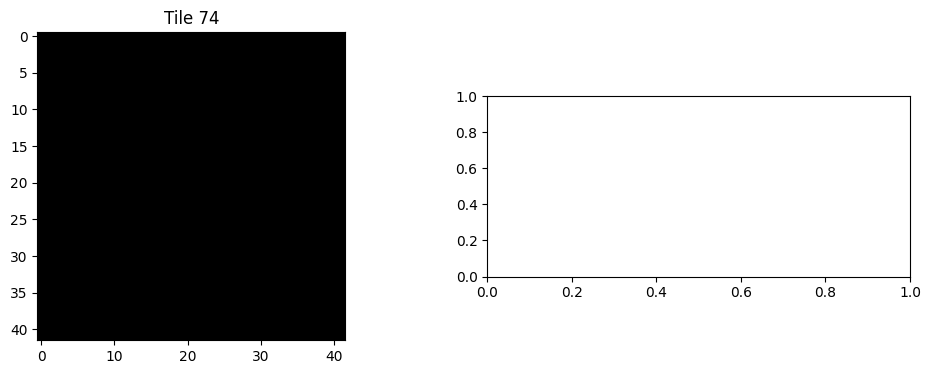

Comparing 1 0
{}
Max confidence till now 0 with digit 1


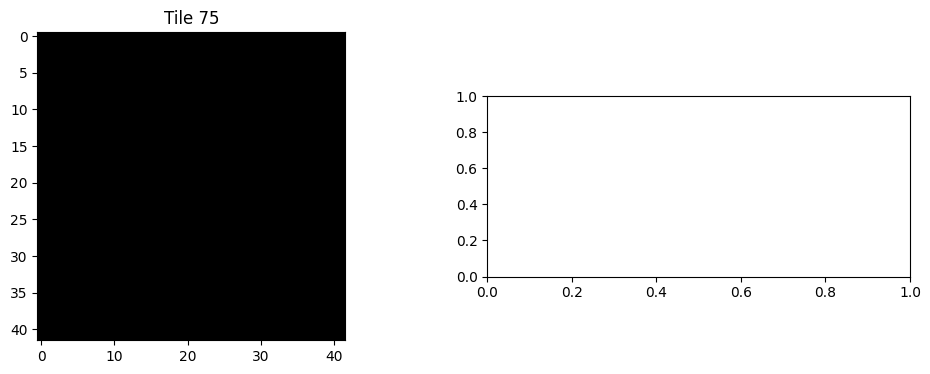

Comparing 1 0
{}
Max confidence till now 0 with digit 1


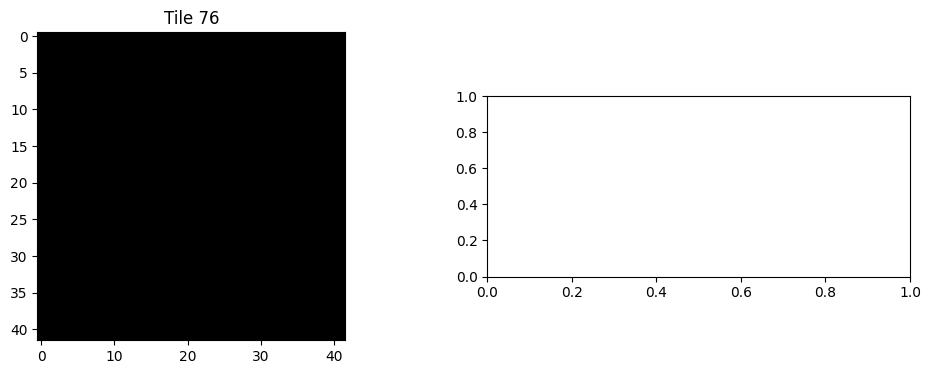

Comparing 8 0.06435643564356436
{1: 0.5787671232876712, 2: 0.7272727272727273, 3: 0.8094059405940595, 4: 0.6625, 5: 0.7872340425531915, 6: 0.7660714285714286, 7: 0.6733870967741935, 8: 0.8371212121212122, 9: 0.693069306930693}
Max confidence till now 0.8371212121212122 with digit 8
Showing final qarar 0.8371212121212122 8


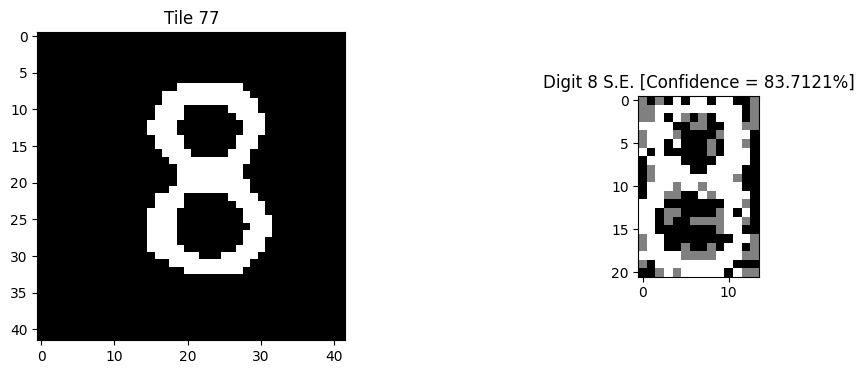

Comparing 4 0
{1: 0.7568493150684932, 2: 0.5844155844155844, 3: 0.6113861386138614, 4: 0.796875, 5: 0.6409574468085106, 6: 0.7178571428571429, 7: 0.4879032258064516, 8: 0.7215909090909091, 9: 0.6311881188118812}
Max confidence till now 0.796875 with digit 4
Showing final qarar 0.796875 4


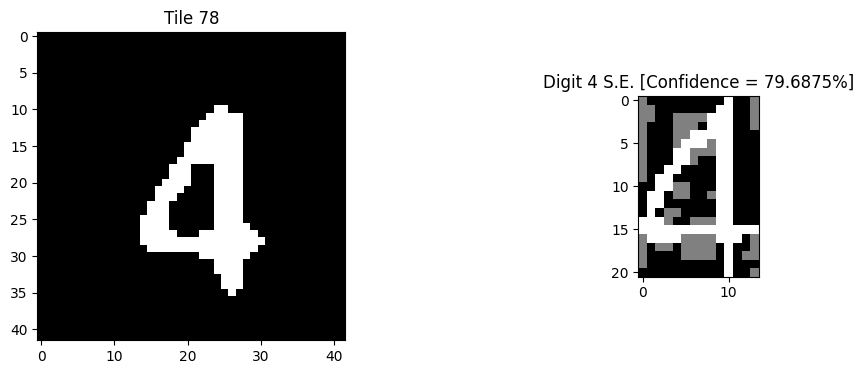

Comparing 1 0
{}
Max confidence till now 0 with digit 1


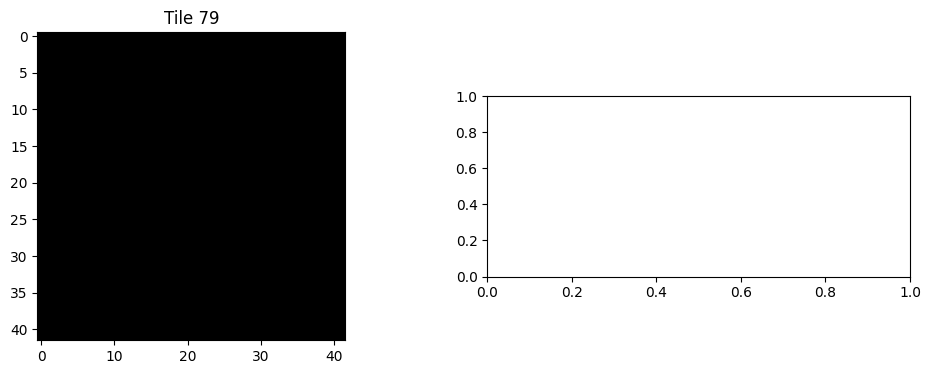

Comparing 1 0
{}
Max confidence till now 0 with digit 1


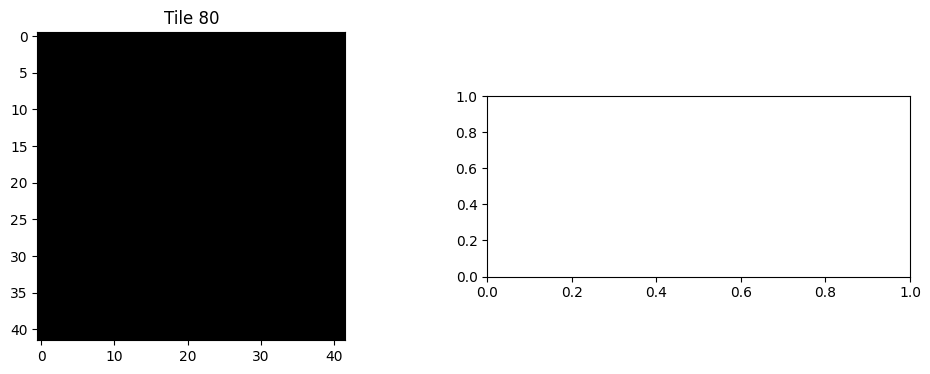

In [25]:
import asyncio
import nest_asyncio
nest_asyncio.apply()
sudoku_ocr = np.zeros((9*9,))
async def ocr(tile_i, tile, min_confidence):
    max_confidence = -100
    max_confidence_se = None
    max_confidence_se_i = -1  # To keep track of the SE with max confidence

    dic = {}
    # Loop over all SEs
    for se_i, se in enumerate(digit_ses):
        # To obtain scale-invariance, let's try different input sizes
        for h in range(tile.shape[0], se.shape[0], -1):
            y, x = tile.shape
            resized_tile = cv2.resize(tile, ((h*x)//y, h), cv2.INTER_NEAREST)
            resized_tile = cv2.threshold(resized_tile, 1, 255, cv2.THRESH_BINARY)[1]
            confidence = se_match(se, resized_tile)
            if dic.get(se_i+1, 0) < confidence:
                dic[se_i+1] = confidence
            if confidence > max_confidence:
                max_confidence = confidence
                max_confidence_se = se
                max_confidence_se_i = se_i  # Update the SE index

    fig = plt.figure(figsize=(12, 4))  # Create a new figure for each tile
    gs = plt.GridSpec(5, 2)
    ax1 = fig.add_subplot(gs[:, 0])
    ax2 = fig.add_subplot(gs[1:4, 1])
    ax1.set_title(f"Tile {tile_i}")
    ax1.imshow(tile, cmap="gray");
    

    if (max_confidence_se_i+1) == 8:
        if max_confidence < 0.5:
            new_max_conf = -1
            new_i = -1
            for num, conf in dic.items():
                if num != 8:
                    if conf > new_max_conf:
                        new_max_conf = conf
                        new_i = num - 1
            max_confidence = new_max_conf
            max_confidence_se_i = new_i
            max_confidence_se = digit_ses[max_confidence_se_i]
        else:
            print(f"Comparing 8 {confidence}")
            min_confidence = 0.6

    if (max_confidence_se_i+1) == 4:
        print(f"Comparing 4 {confidence}")
        min_confidence = 0.65
    
    if (max_confidence_se_i+1) == 1:
        print(f"Comparing 1 {confidence}")
        min_confidence = 0.2

    print(dic)
    print(f"Max confidence till now {max_confidence} with digit {max_confidence_se_i + 1}")
    if max_confidence >= min_confidence:
        
        
        # Don't Uncomment Pleaaaaase
        # if max_confidence_se_i+1 ==3:
        #     diff = (max_confidence-dic[1])*100
        #     if diff<(3.3):
        #         max_confidence = dic[1]
        #         max_confidence_se_i = max_confidence_se_i - 2
        #         max_confidence_se = digit_ses[max_confidence_se_i]

        
        print(f"Showing final qarar {max_confidence} {max_confidence_se_i+1}")
        ax2.imshow(max_confidence_se, cmap="gray", vmin=-1, vmax=1);
        ax2.set_title(f"Digit {max_confidence_se_i+1} S.E. [Confidence = {round(100*max_confidence, 4)}%]");
        sudoku_ocr[tile_i] = max_confidence_se_i + 1

    plt.show()

# Loop over all tiles
await asyncio.wait([asyncio.create_task(ocr(tileno, tiles[tileno], 0.38)) for tileno in range(9*9)]);


In [26]:
sitiles = []  # Scale-invariant tiles
y, x = tiles[0].shape
for i, tile in enumerate(tiles):
    sitiles.append([])
    for h in range(y//2, digit_ses[0].shape[0], -1):
        resized_tile = cv2.resize(tile, ((h*x)//y, h), cv2.INTER_NEAREST)
        resized_tile = cv2.threshold(resized_tile, 1, 255, cv2.THRESH_BINARY)[1]
        sitiles[i].append(resized_tile)

In [27]:
def textize_sudoku(board):
    sudoku_ocr_text = ''
    for i, row in enumerate(board):
        sudoku_ocr_text += ' ├───────────┼───────────┼───────────┤ ' if (i%3 == 0) else ' │           │           │           │ '
        sudoku_ocr_text += '\n'
        sudoku_ocr_text += ' │ '
        for j, cell in enumerate(row): sudoku_ocr_text += f"{cell if cell != 0 else ' '} {' ' if (j%3 != 2) else '│'} "
        sudoku_ocr_text += '\n'
    sudoku_ocr_text += ' ├───────────┼───────────┼───────────┤ '
    return sudoku_ocr_text

In [28]:
def find_next_empty_cell(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return (i, j)
    return None

def is_valid(board, num, row, col):
    for i in range(9):  # row and column checks
        if board[row][i] == num and col != i: return False
        if board[i][col] == num and row != i: return False

    # Check box
    box_row = (row // 3) * 3
    box_col = (col // 3) * 3
    for i in range(box_row, box_row + 3):
        for j in range(box_col, box_col + 3):
            if board[i][j] == num and (i, j) != (row, col):
                return False
    return True

def solve(board):
    empty_cell_pos = find_next_empty_cell(board)
    if empty_cell_pos == None: return True  # No empty cells; board is solved
    row, col = empty_cell_pos
    for num in range(1, 10):
        if is_valid(board, num, row, col):  # Find a valid value to proceed with
            board[row][col] = num  # 'num' seems valid (so far), proceed with it
            if solve(board): return True  # Try to solve the rest of the board
            board[row][col] = 0  # Couldn't continue? Then 'num' was wrong! :(
    return False

def solve_sudoku(board):
    sudoku_to_solve = np.copy(board)
    solve(sudoku_to_solve)
    solved_sudoku = []
    for i in range(9):
        solved_sudoku.append([])
        for j in range(9):
            solved_sudoku[i].append("\033[1m"+str(board[i][j])+"\033[0m" if (board[i][j] != 0) else "\033[91m"+str(sudoku_to_solve[i][j])+"\033[0m")
    return solved_sudoku

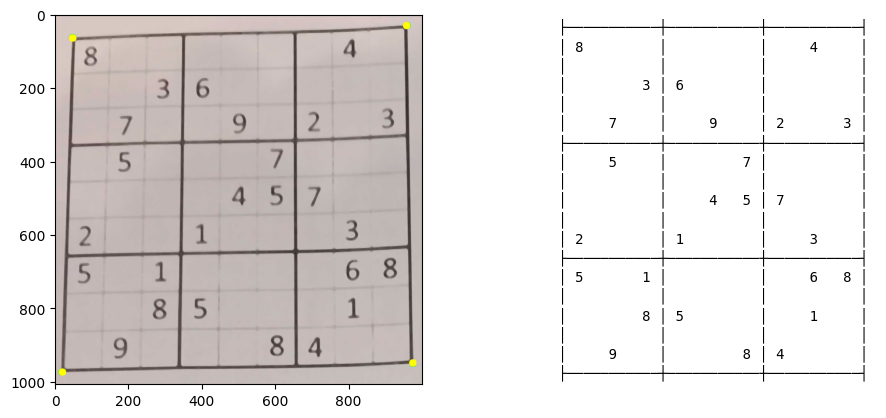

In [29]:
plt.imshow(img);
plt.figtext(1, 0.125, textize_sudoku(sudoku_ocr.reshape((9, 9)).astype(int)), fontfamily='monospace');

In [30]:
print(textize_sudoku(solve_sudoku(sudoku_ocr.reshape((9, 9)).astype(int))))

 ├───────────┼───────────┼───────────┤ 
 │ 8   1   2 │ 7   5   3 │ 6   4   9 │ 
 │           │           │           │ 
 │ 9   4   3 │ 6   8   2 │ 1   7   5 │ 
 │           │           │           │ 
 │ 6   7   5 │ 4   9   1 │ 2   8   3 │ 
 ├───────────┼───────────┼───────────┤ 
 │ 1   5   4 │ 2   3   7 │ 8   9   6 │ 
 │           │           │           │ 
 │ 3   6   9 │ 8   4   5 │ 7   2   1 │ 
 │           │           │           │ 
 │ 2   8   7 │ 1   6   9 │ 5   3   4 │ 
 ├───────────┼───────────┼───────────┤ 
 │ 5   2   1 │ 9   7   4 │ 3   6   8 │ 
 │           │           │           │ 
 │ 4   3   8 │ 5   2   6 │ 9   1   7 │ 
 │           │           │           │ 
 │ 7   9   6 │ 3   1   8 │ 4   5   2 │ 
 ├───────────┼───────────┼───────────┤ 
